In [1]:
%load_ext rpy2.ipython
%R library(dplyr); library(ggplot2)

//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)


array(['ggplot2', 'dplyr', 'tools', 'stats', 'graphics', 'grDevices',
       'utils', 'datasets', 'methods', 'base'], 
      dtype='|S9')

In [2]:
group="group1"

In [3]:
import os

prelim_groups=open("phage_by_group.txt")
phage_grp={}
for line in prelim_groups.readlines():
    line=line.rstrip("\n")
    vec=line.split("\t")
    phage_grp[vec[0]]=vec[1]
groups=list(phage_grp.values())
unique=[]
for value in groups:
    if value not in unique:
        unique.append(value)
group1=[]
for value in phage_grp.keys():
    if phage_grp.get(value)=='CNSv2.0:1':
        group1.append(value)
print(group1)
os.chdir("./"+group)

['1.278.O.', '1.289.A.', '1.199.B.', '2.095.B.', '1.003.O.', '1.047.O.', '1.286.O.', '1.029.O.', '1.284.A.', '1.287.O.', '1.265.O.', '1.291.O.', '1.105.O.', '1.038.O.', '1.154.O.', '1.173.O.', '1.177.O.', '1.213.O.', '1.036.O.', '1.276.O.', '1.016.O.', '1.243.O.', '1.198.B.', '1.127.O.', '1.263.B.', '1.123.O.', '1.216.O.', '1.039.O.', '1.232.O.', '1.178.O.', '1.054.O.', '1.236.O.', '1.119.O.', '1.151.O.', '1.067.O.', '1.112.O.', '1.198.A.', '1.199.A.', '1.149.O.', '1.007.O.', '1.186.O.', '1.079.O.', '1.091.O.', '1.143.O.', '1.197.A.', '1.137.O.', '1.106.O.', '1.090.B.', '1.273.O.', '1.071.A.', '1.060.A.', '1.042.O.', '1.263.A.', '1.113.A.', '1.135.O.', '2.095.A.', '1.061.O.', '1.248.O.', '1.144.O.', '1.256.O.', '1.231.O.', '1.052.A.']


In [39]:
len(group1)

62

###Setting up folders and moving files to the right places:

In [7]:
output=open("./move_"+group+".sh","w")
output.write("mkdir "+group+"\n")
for line in group1:
    output.write("mv "+line+"*fastq ./"+group+"/\n")
output.close()
!scp move_group1.sh jbrown@eofe4.mit.edu:/nobackup1/jbrown/nahant_phage_reads/

move_group1.sh                                100% 1749     1.7KB/s   00:00    


In [8]:
!scp jbrown@eofe4.mit.edu:/nobackup1/jbrown/nahant_phage_reads/group1/group*_fastqlist.txt ./

group1_fastqlist.txt                          100% 1815     1.8KB/s   00:00    


###Write script for initial assembly:

In [6]:
step1c1=open("step1.contig1.sh","w")
step1c1.write("#!/bin/bash\n#SBATCH -n 16\n#SBATCH -N 1\n#SBATCH -o s1c1.out\n#SBATCH -e s1c1.err\n#SBATCH -p sched_mit_chisholm\n\n")
step1c1.write("module add engaging/clc-assembly-cell\nmodule add engaging/samtools/1.1\nmodule add engaging/bedtools/2.22.1\n\n")
for line in group1:
    name=line.rstrip("\n")
    step1c1.write("\n\n#"+name+"\nclc_assembler -o "+name+"step1.clc.fasta -m 500 -p fb ss 100 300 -q "+ name+"*.fastq\n")
    step1c1.write("samtools faidx "+name+"step1.clc.fasta 'contig_1'>"+name+"step1.contig1.fasta\n\nclc_mapper -o "+name+"step1.contig1.cas -p fb ss 100 300 -q "+name+"*.fastq -d "+name+"step1.contig1.fasta -a local -r ignore\n")
    step1c1.write("clc_cas_to_sam -a "+name+"step1.contig1.cas -o "+name+"step1.contig1.bam\n\nsamtools sort "+name+"step1.contig1.bam "+name+"sorted.step1.contig1\nsamtools index "+name+"sorted.step1.contig1.bam\n\nbedtools genomecov -ibam "+name+"sorted.step1.contig1.bam -d > "+name+"step1.contig1.genomecoverage.txt\n\n")
step1c1.close()
!open step1.contig1.sh -a textedit

In [7]:
!scp step1.contig1.sh jbrown@eofe4.mit.edu:/nobackup1/jbrown/nahant_phage_reads/group1/ 
    #run sbatch step1.contig1.sh on mit cluster

step1.contig1.sh                              100%   36KB  36.4KB/s   00:00    


In [9]:
!scp jbrown@eofe4.mit.edu:/nobackup1/jbrown/nahant_phage_reads/group1/*genomecoverage* ./
!scp jbrown@eofe4.mit.edu:/nobackup1/jbrown/nahant_phage_reads/group1/*step1.contig1.fasta ./

1.003.O.step1.contig1.genomecoverage.txt      100%  777KB  64.8KB/s   00:12    
1.007.O.step1.contig1.genomecoverage.txt      100%  993KB  76.4KB/s   00:13    
1.016.O.step1.contig1.genomecoverage.txt      100%  935KB  58.4KB/s   00:16    
1.029.O.step1.contig1.genomecoverage.txt      100%  899KB  33.3KB/s   00:27    
1.036.O.step1.contig1.genomecoverage.txt      100%  813KB  81.3KB/s   00:10    
1.038.O.step1.contig1.genomecoverage.txt      100%  954KB  73.4KB/s   00:13    
1.039.O.step1.contig1.genomecoverage.txt      100%  829KB  82.9KB/s   00:10    
1.042.O.step1.contig1.genomecoverage.txt      100%  912KB  60.8KB/s   00:15    
1.047.O.step1.contig1.genomecoverage.txt      100%  890KB  98.9KB/s   00:09    
1.052.A.step1.contig1.genomecoverage.txt      100%  785KB 112.1KB/s   00:07    
1.054.O.step1.contig1.genomecoverage.txt      100%  764KB  76.4KB/s   00:10    
1.060.A.step1.contig1.genomecoverage.txt      100%  752KB 107.4KB/s   00:07    
1.061.O.step1.contig1.genomecoverage.txt

In [10]:
!scp jbrown@eofe4.mit.edu:/nobackup1/jbrown/nahant_phage_reads/group1/*step1.clc.fasta ./

1.003.O.step1.clc.fasta                       100%   42KB  41.6KB/s   00:00    
1.007.O.step1.clc.fasta                       100%   98KB  98.3KB/s   00:00    
1.016.O.step1.clc.fasta                       100%  134KB 134.1KB/s   00:00    
1.029.O.step1.clc.fasta                       100%  134KB 133.6KB/s   00:00    
1.036.O.step1.clc.fasta                       100%   51KB  50.7KB/s   00:00    
1.038.O.step1.clc.fasta                       100%   49KB  49.2KB/s   00:00    
1.039.O.step1.clc.fasta                       100%   78KB  77.8KB/s   00:00    
1.042.O.step1.clc.fasta                       100%   50KB  50.0KB/s   00:00    
1.047.O.step1.clc.fasta                       100%   99KB  98.8KB/s   00:00    
1.052.A.step1.clc.fasta                       100%   89KB  88.9KB/s   00:00    
1.054.O.step1.clc.fasta                       100%   41KB  41.5KB/s   00:00    
1.060.A.step1.clc.fasta                       100%   41KB  40.8KB/s   00:00    
1.061.O.step1.clc.fasta                 

###Look at contig information:

In [43]:
%%R -i group1

for (item in group1){
    filename<-paste(item,"step1.contig1.genomecoverage.txt",sep="")
    coverage<-read.table(filename, sep="\t")
    pdf(paste(item,"step1.contig1.coverage.plot.pdf", sep=""))
    with(coverage, plot(V2, V3, type="n",xlab="position",ylab="coverage", main=item))
    with(coverage, lines(V2,V3))
    dev.off()
}

In [14]:
from pyfaidx import Fasta

contiginfo="virname\tcontig\tcontig_len\tvir_contig\n"
for phage in group1:   #set up the name of the virus
    fasta1=phage+"step1.clc.fasta"
    f=Fasta(fasta1)
    for seq in f.keys():
        seqlen=len(str(f[seq]))
        contigname=seq
        contiginfo+=(phage+"\t"+contigname+"\t"+str(seqlen)+"\t"+phage+":"+contigname+"\n")

'data.frame':	554 obs. of  4 variables:
 $ virname   : Factor w/ 62 levels "1.003.O.","1.007.O.",..: 55 59 59 59 41 41 41 41 41 41 ...
 $ contig    : Factor w/ 81 levels "contig_1","contig_10",..: 1 1 12 23 1 12 23 34 45 56 ...
 $ contig_len: int  49282 44529 889 640 48312 558 670 541 678 659 ...
 $ vir_contig: Factor w/ 554 levels "1.003.O.:contig_1",..: 540 545 546 547 500 509 510 511 512 513 ...
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    501     682     859    6272    1439   56740 


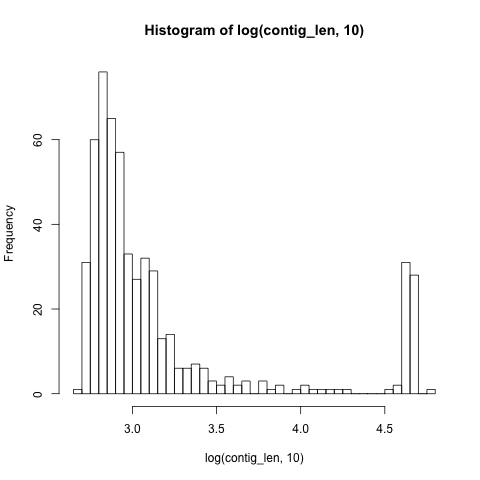

In [15]:
%%R -i contiginfo
contig<-textConnection(contiginfo,open="r",encoding="UTF-8")
contigtable<-read.table(contig, sep="\t", header=TRUE)
#?textConnection
str(contigtable)
with(contigtable, hist(log(contig_len,10), breaks=50))
with(contigtable, summary(contig_len))

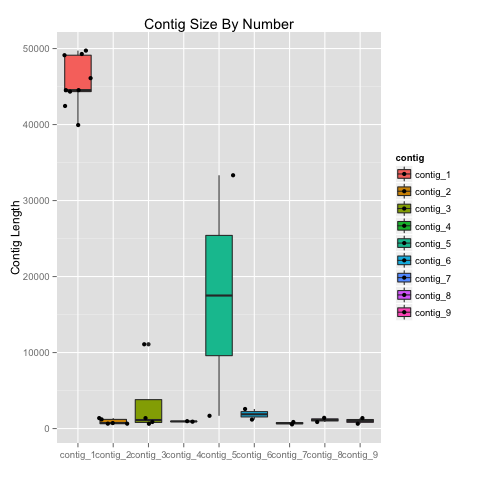

In [20]:
%%R
ci2<-filter(contigtable, contig==c("contig_1","contig_2","contig_3","contig_4","contig_5","contig_6","contig_7","contig_8","contig_9"))
ci2$contig<-as.character(ci2$contig)
#data.frame(ci2)->ci2
qplot(contig,contig_len, data=ci2, geom=c("boxplot", "jitter"),
   fill=contig, main="Contig Size By Number",
   xlab="", ylab="Contig Length")

###Take a look at the read coverage of these assemblies:

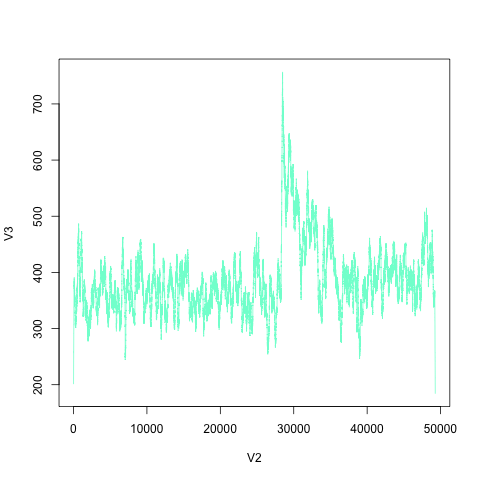

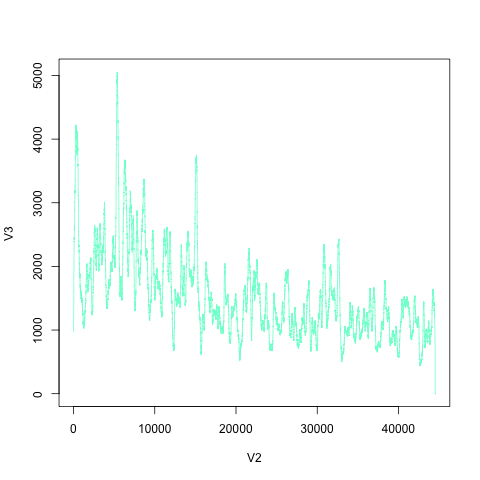

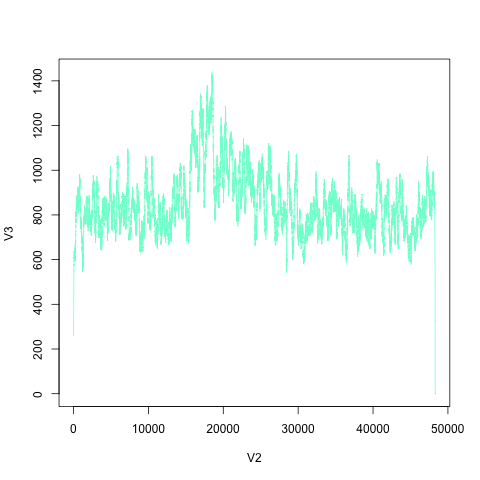

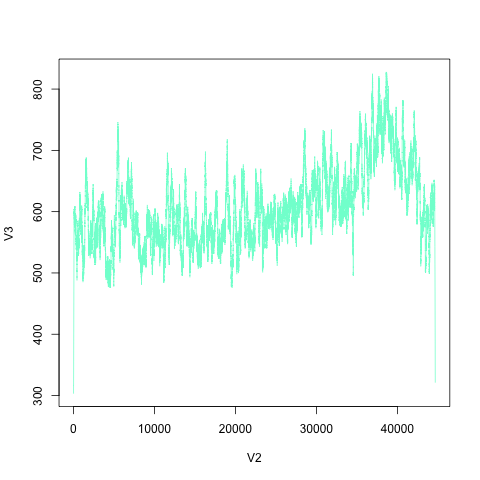

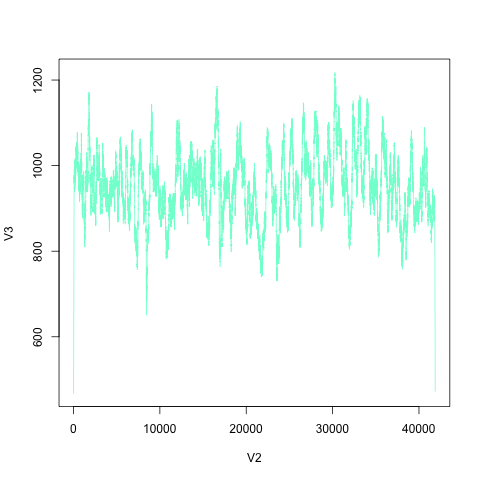

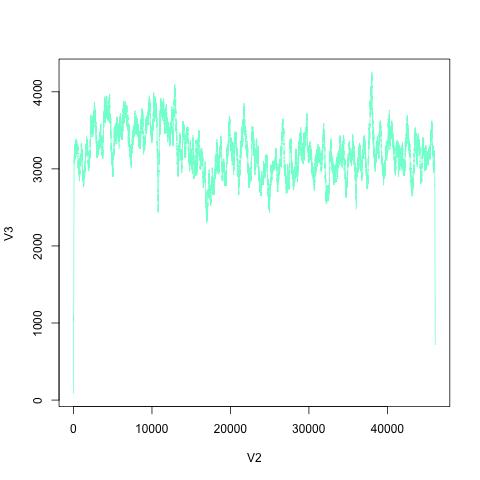

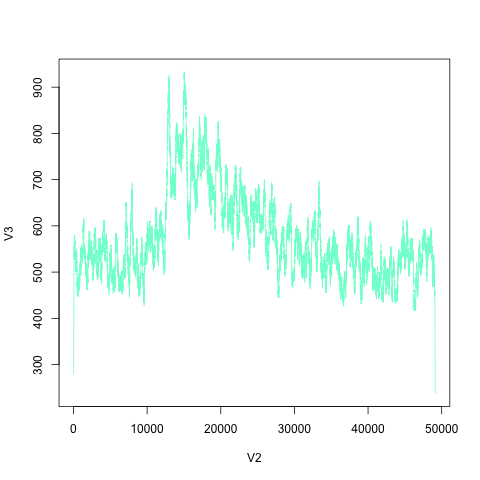

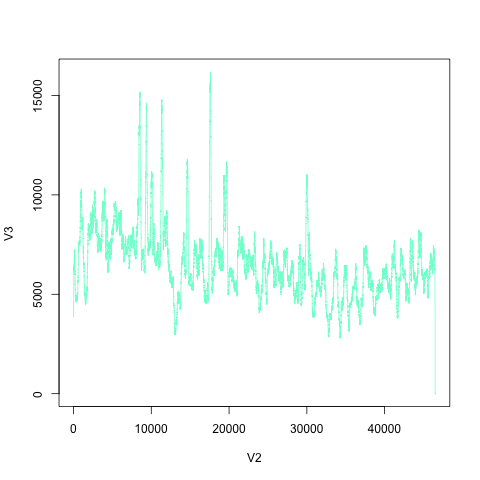

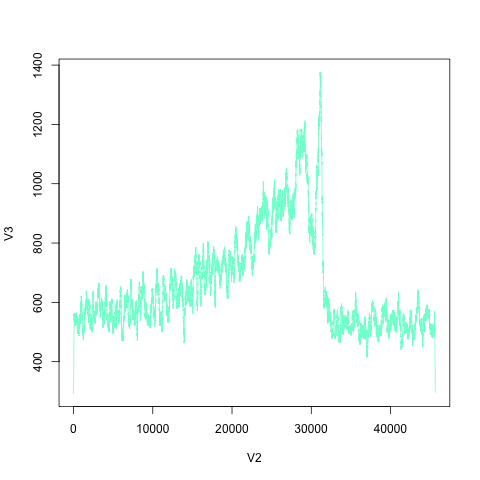

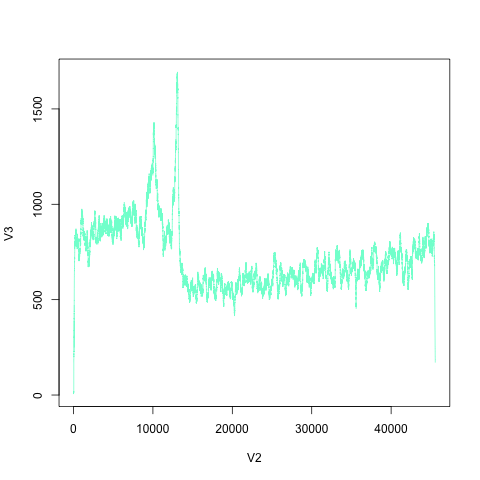

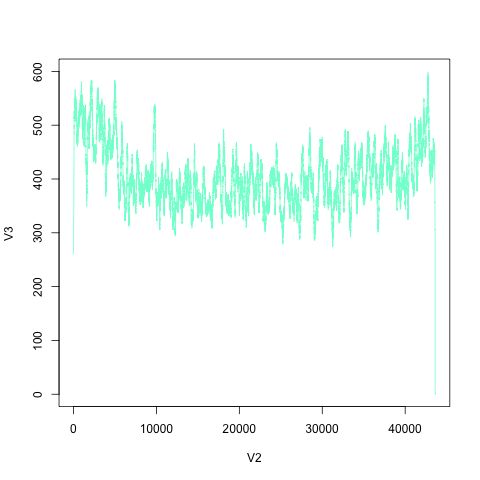

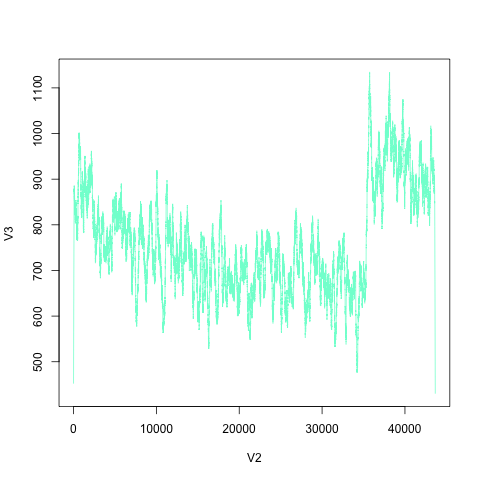

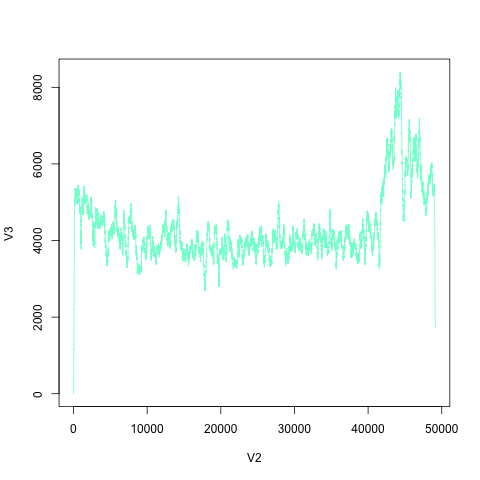

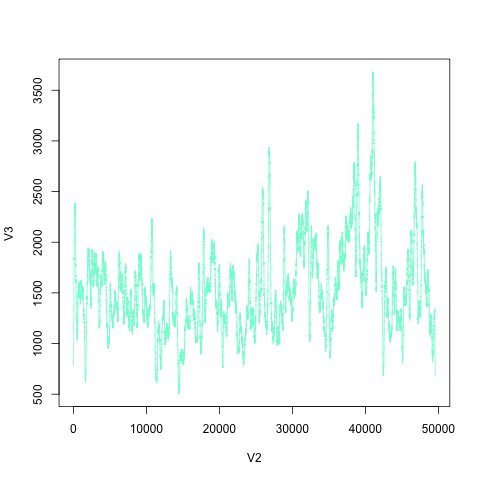

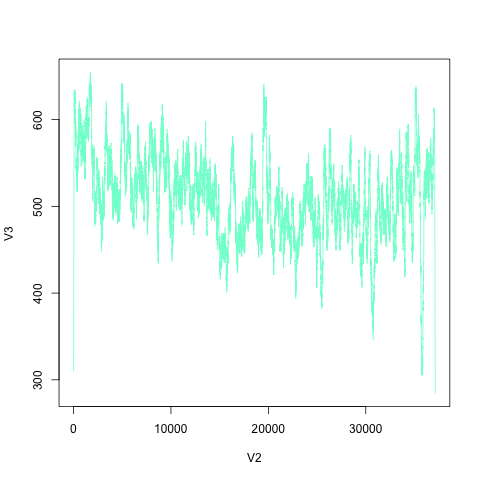

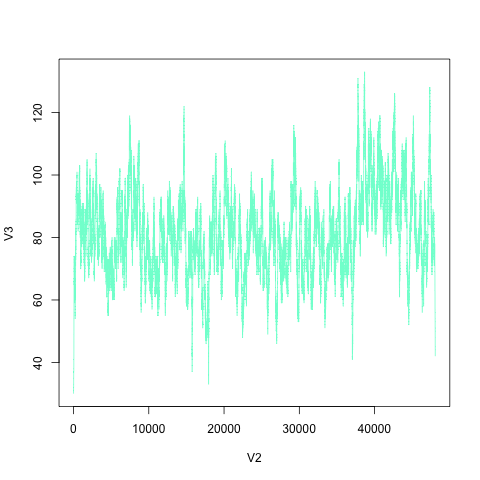

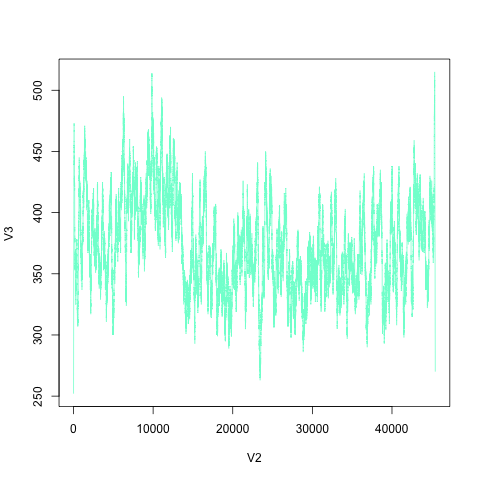

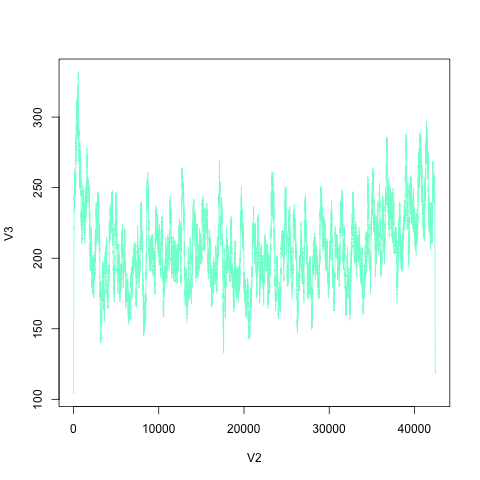

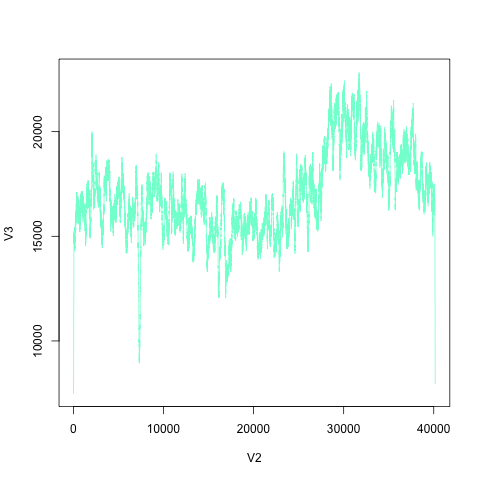

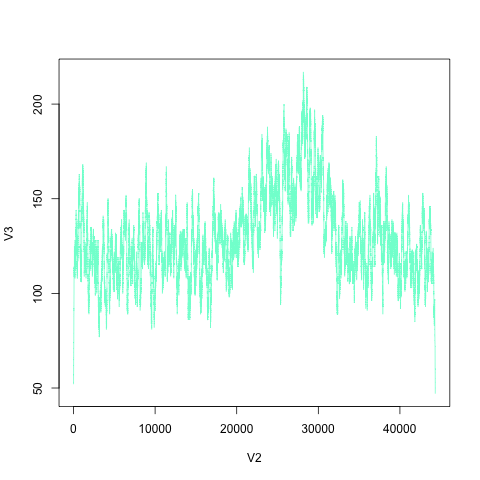

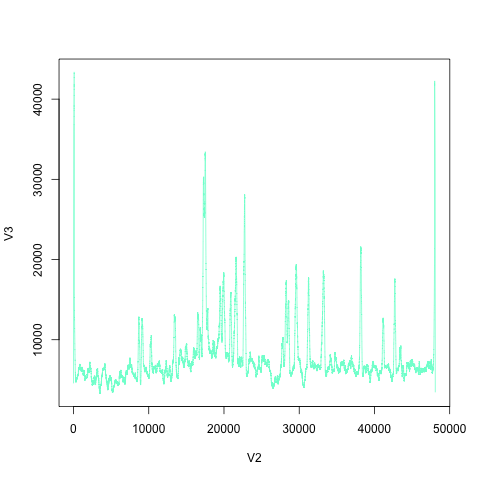

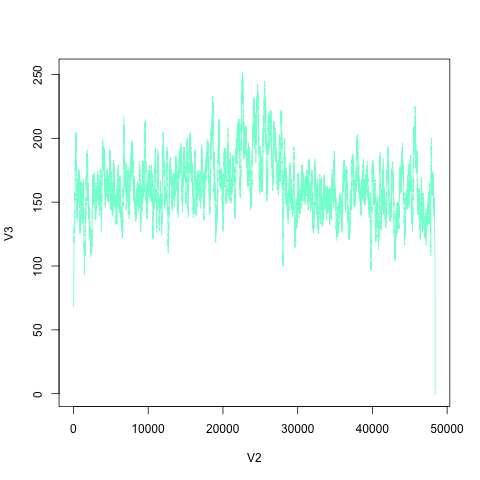

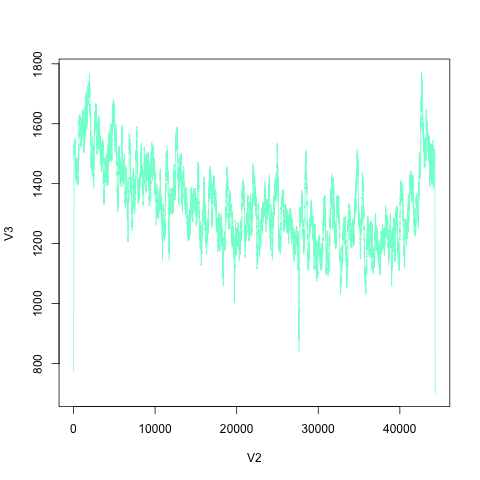

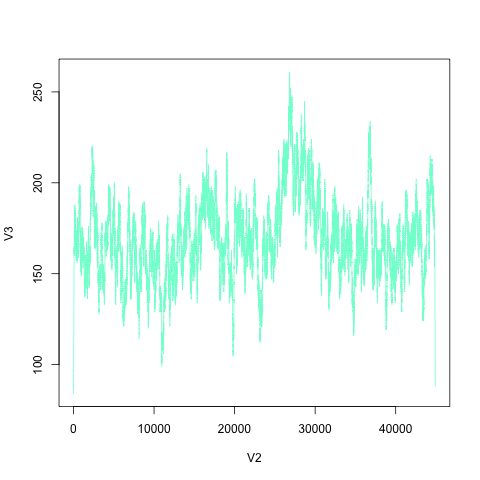

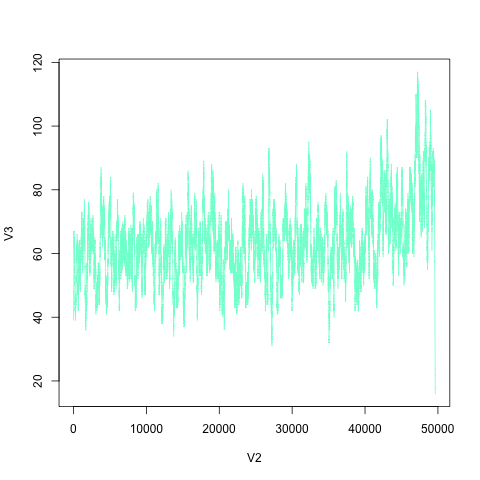

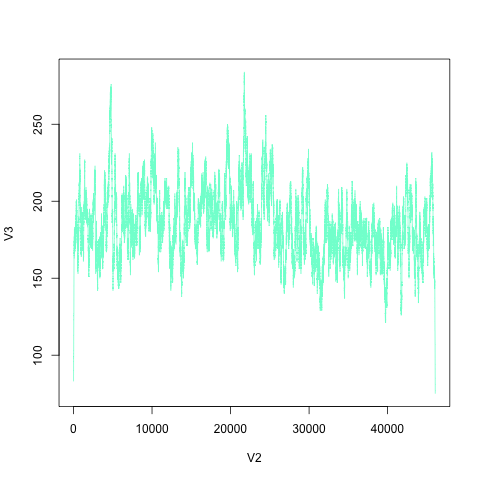

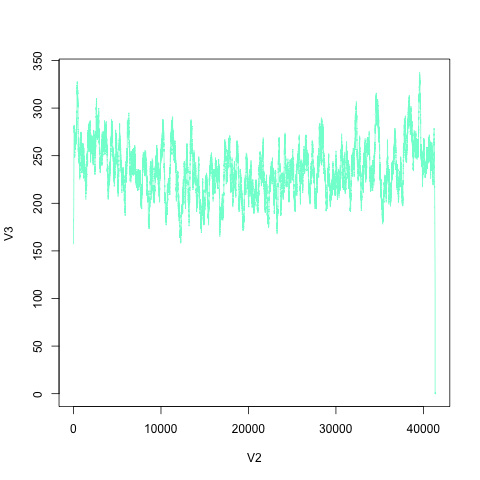

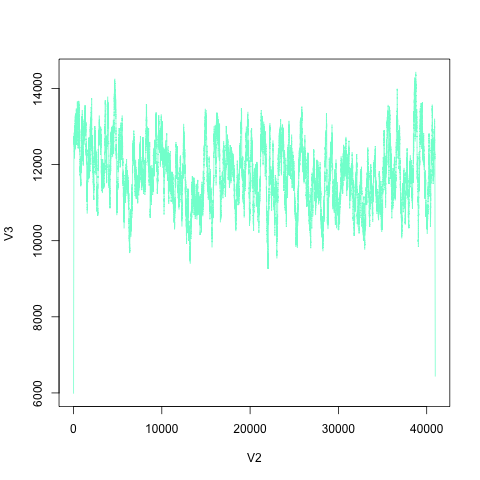

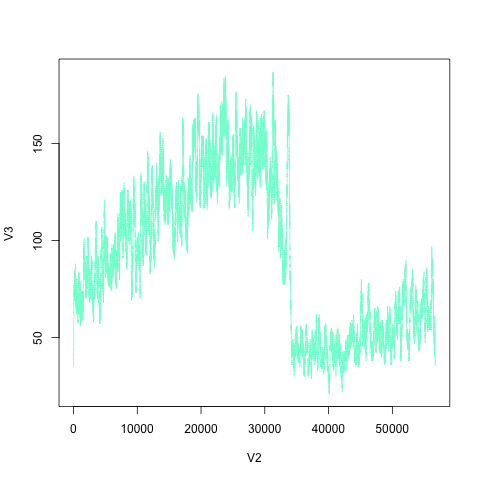

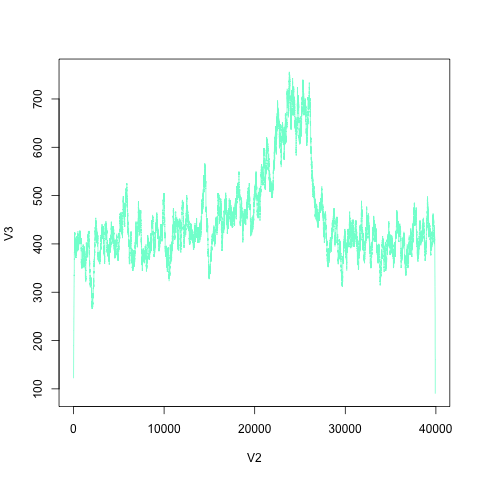

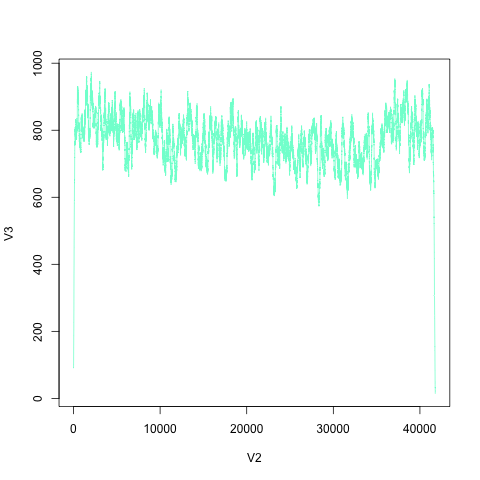

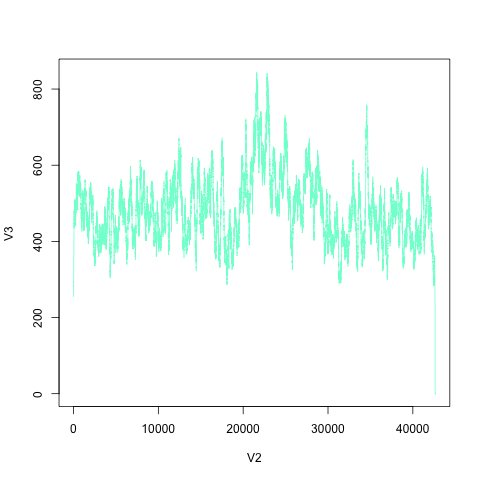

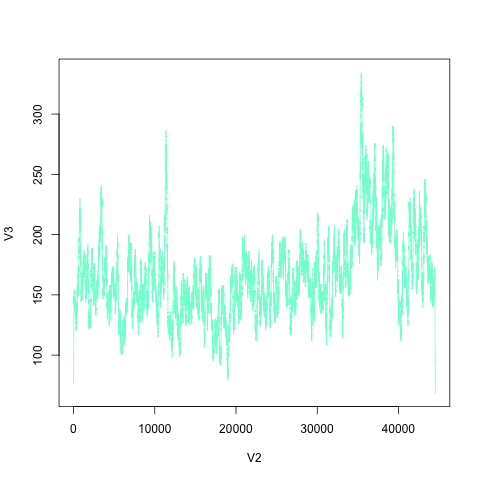

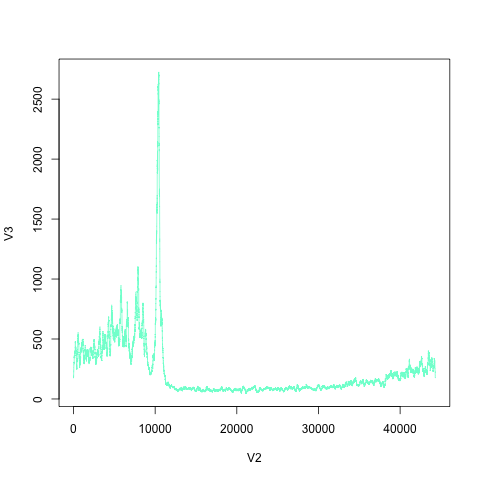

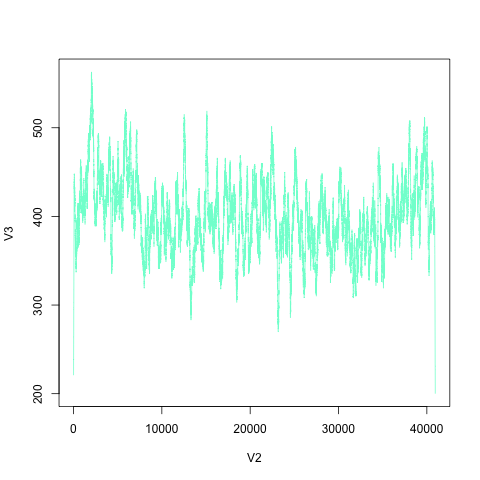

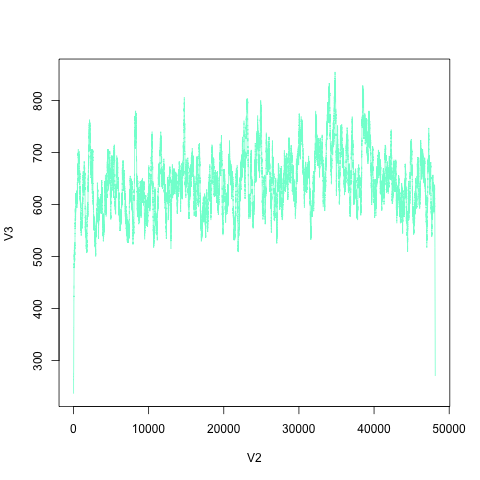

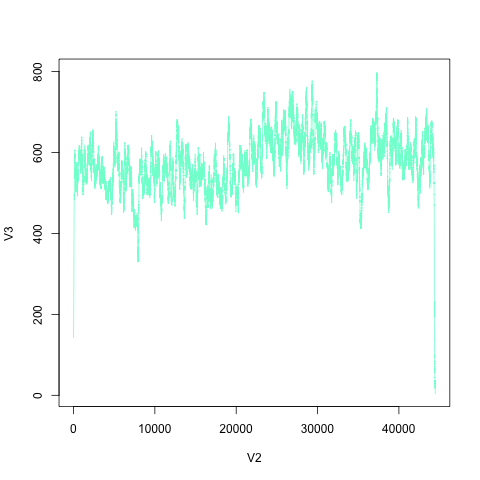

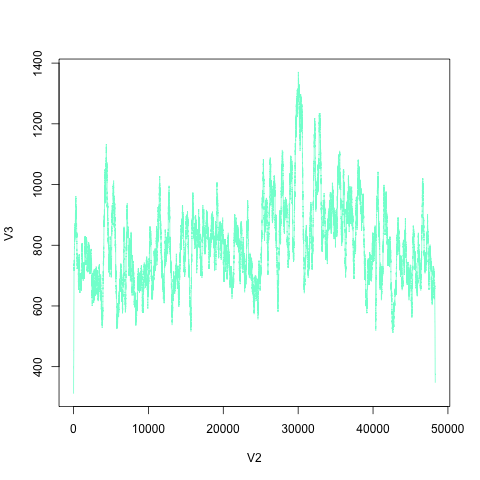

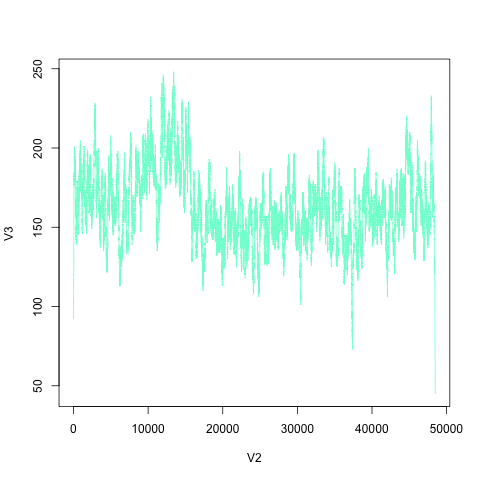

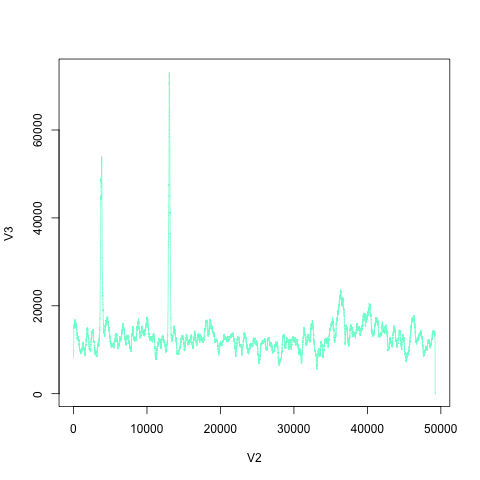

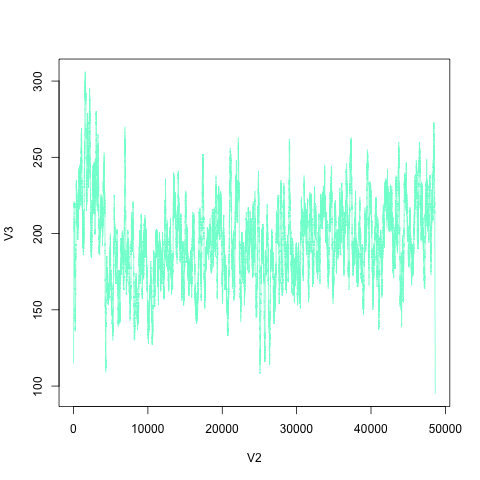

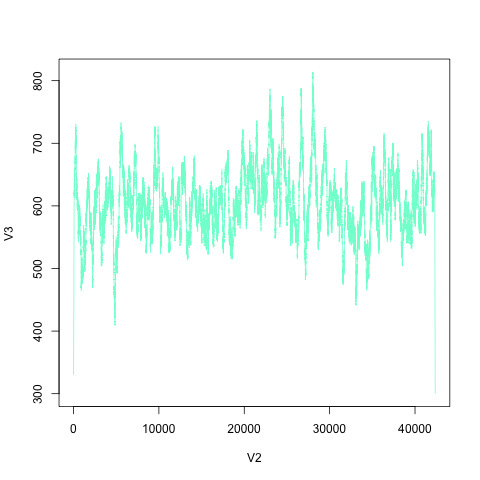

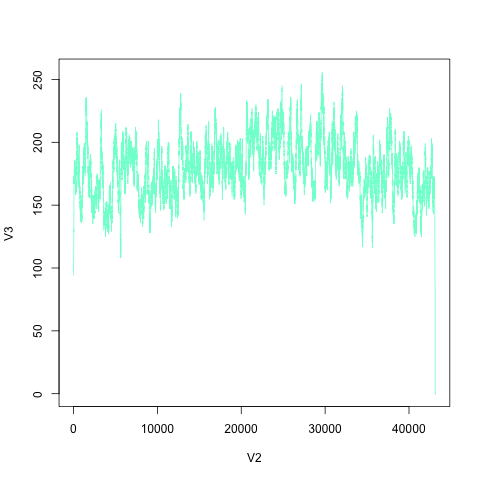

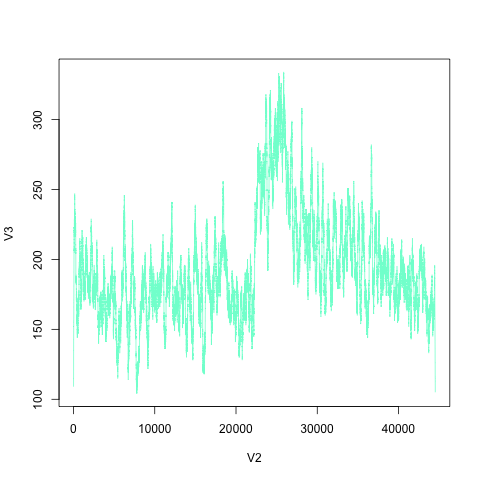

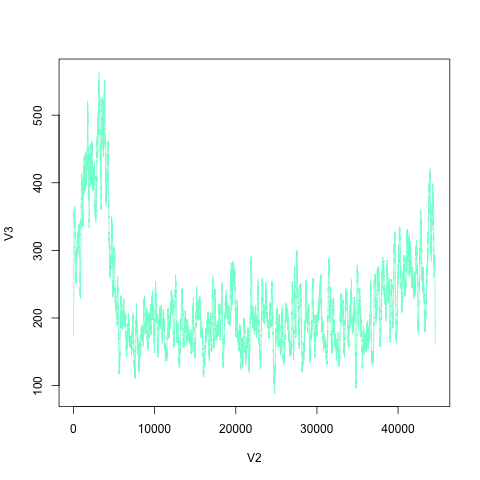

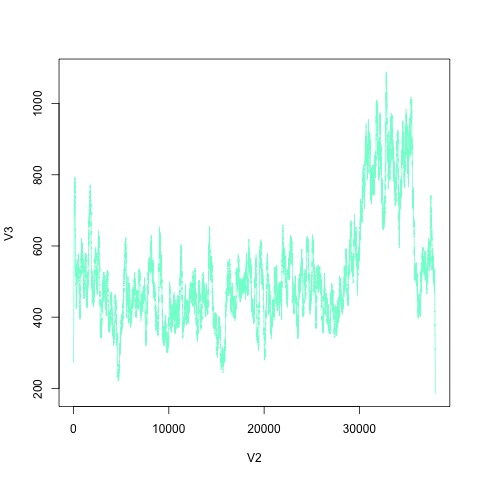

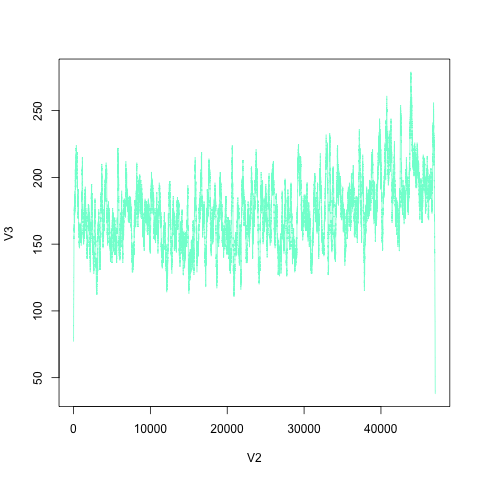

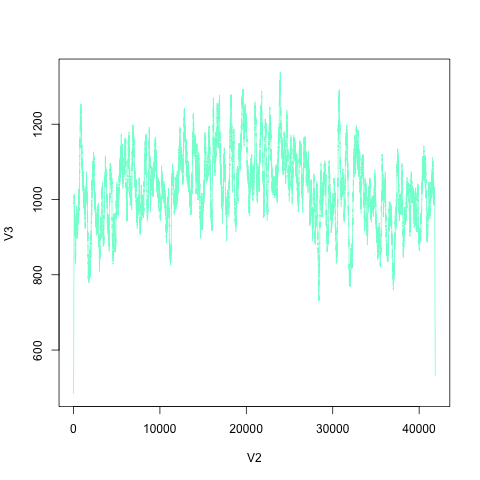

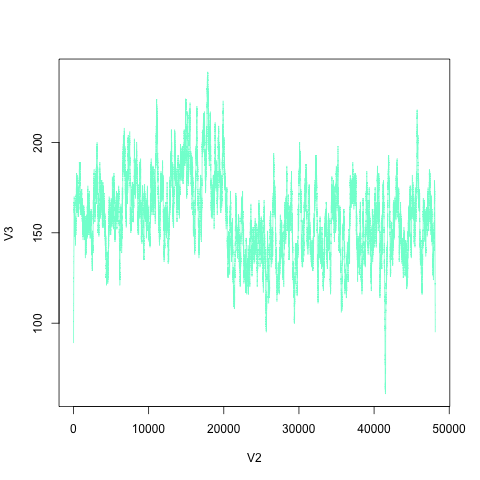

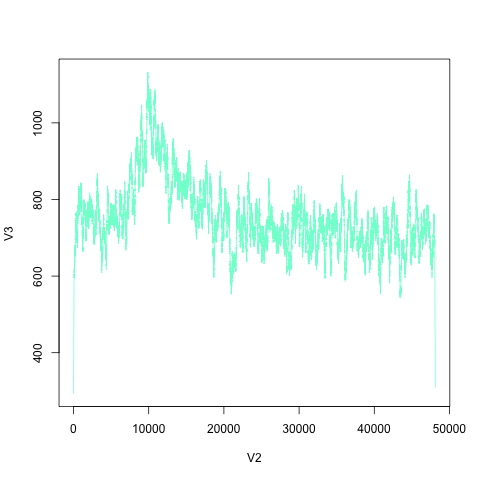

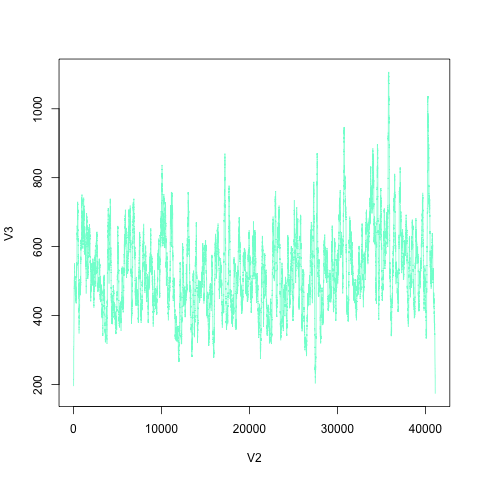

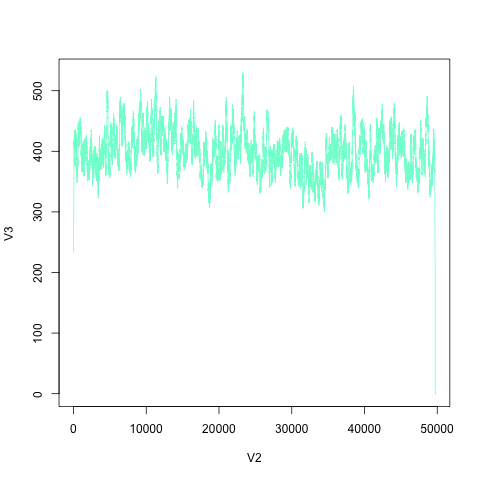

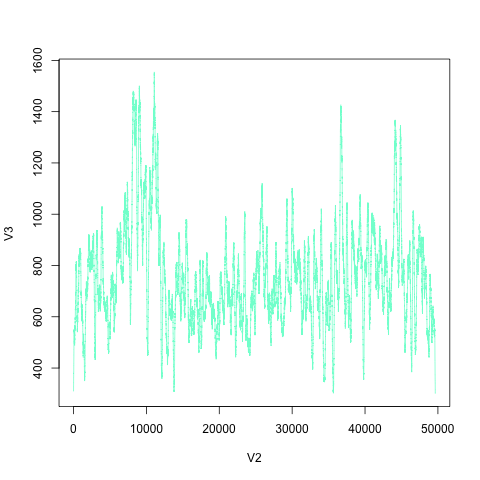

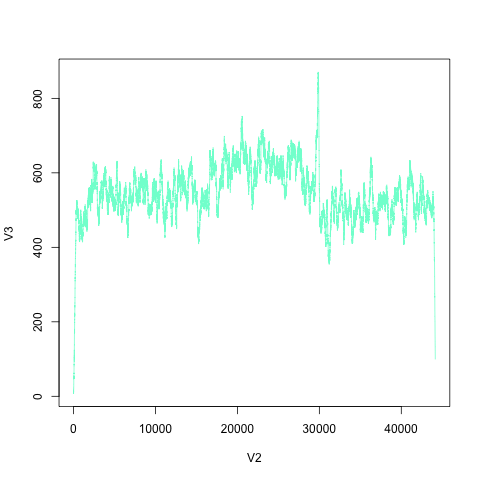

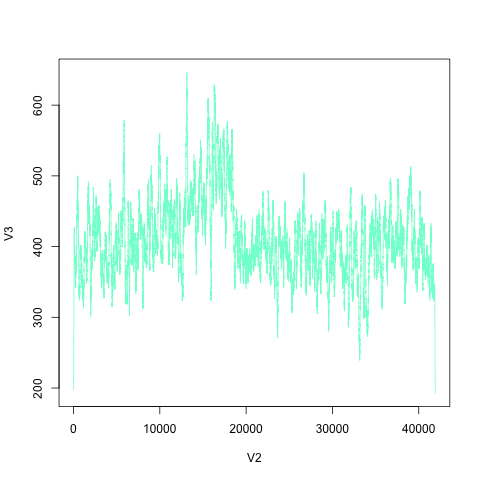

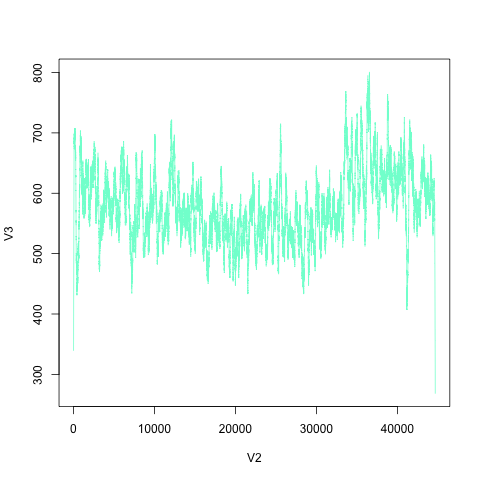

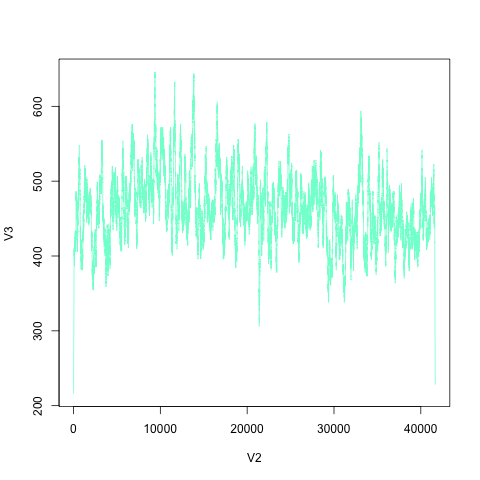

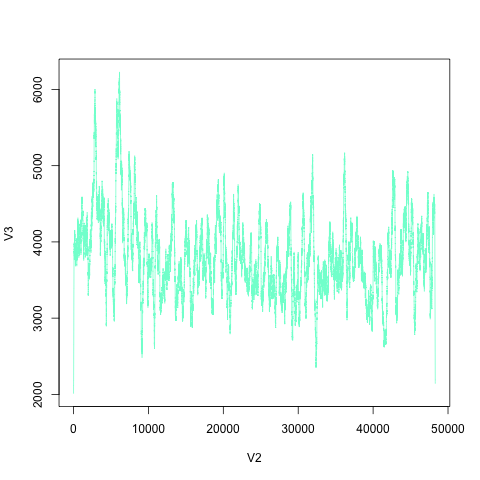

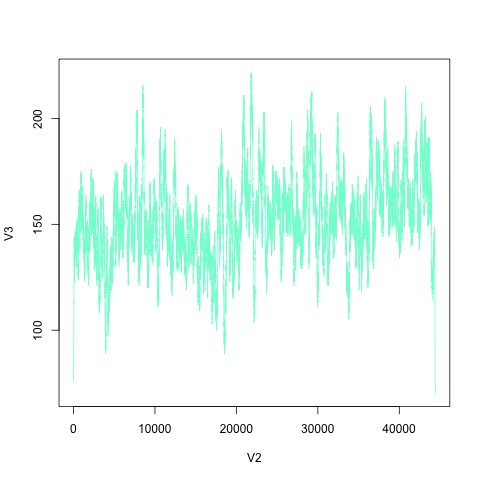

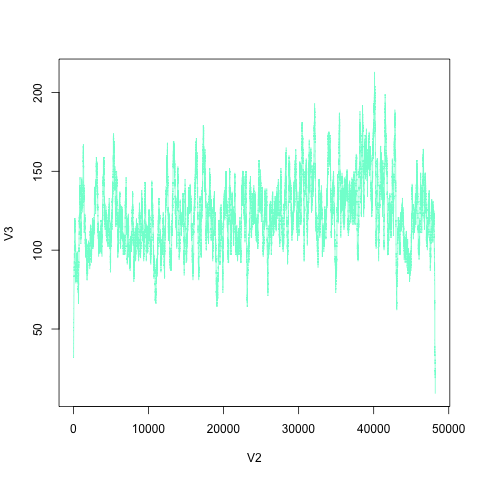

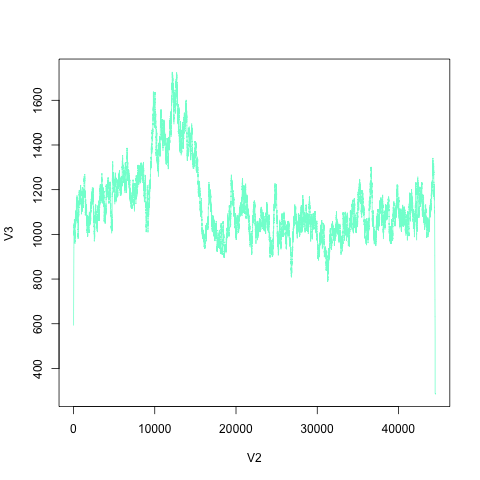

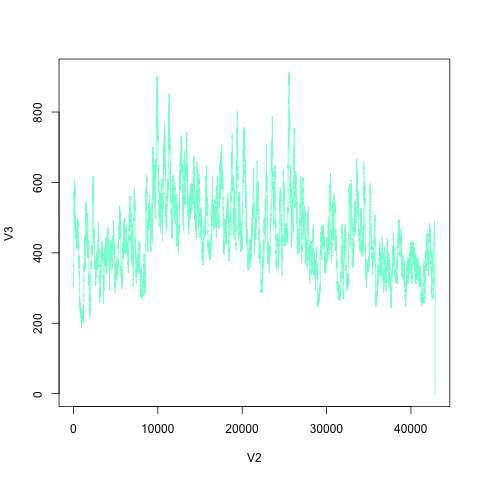

In [7]:
%%R -i group1
for (item in group1){
    filename<-paste(item,"step1.contig1.genomecoverage.txt",sep="")
    coverage<-read.table(filename, sep="\t")
    with(coverage, plot(V2, V3, type="l", col="aquamarine", cex=2))
}

##Identify phage assemblies that contain regions with the highest variability in read coverage at one location.   

[1] 57
[1] "here we go with  1.278.O."
[1] 7
[1] 63
[1] "here we go with  1.284.A."
[1] 3
[1] "here we go with  1.287.O."
[1] 7
[1] "here we go with  1.291.O."
[1] 7
[1] 34
[1] "here we go with  1.232.O."
[1] 2
[1] 11
[1] 21
[1] "here we go with  1.151.O."


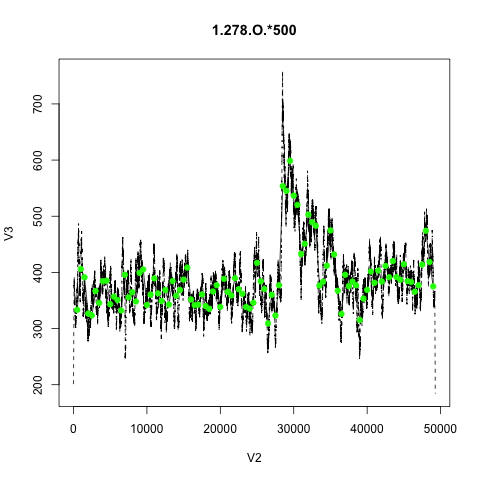

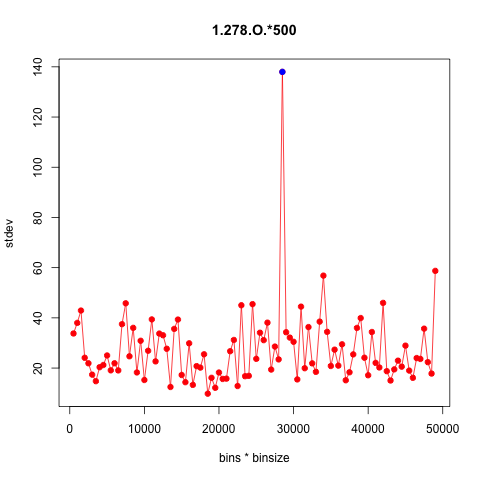

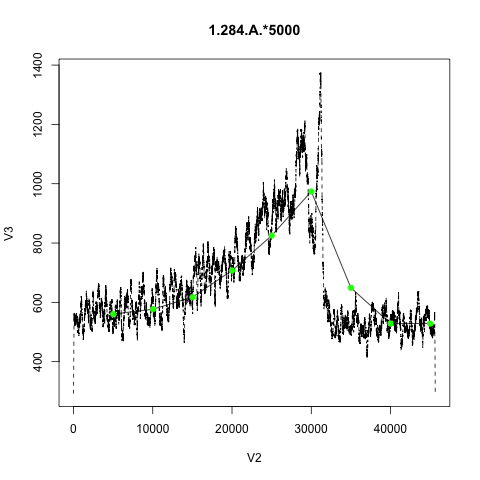

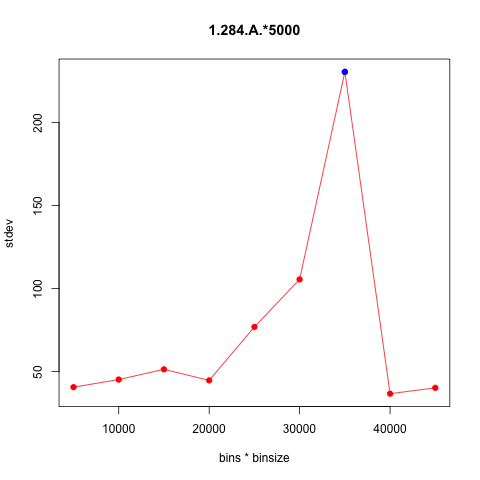

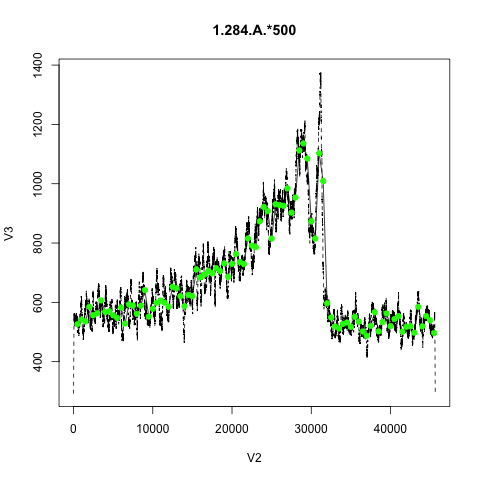

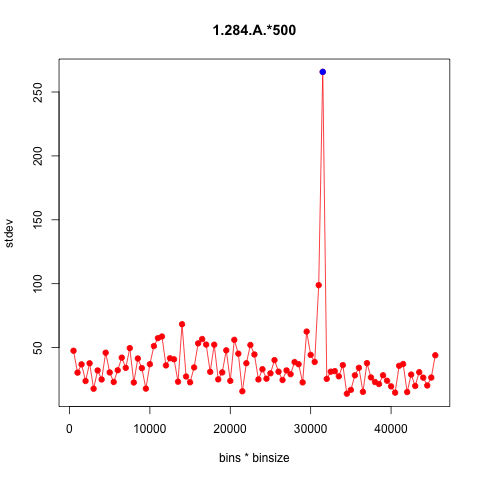

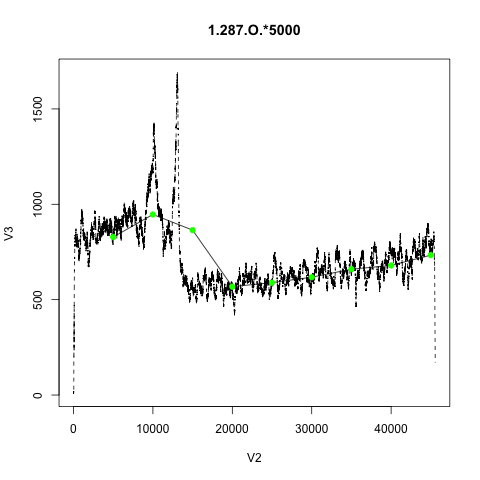

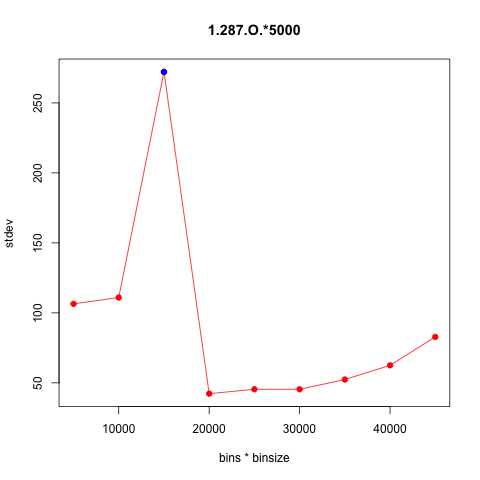

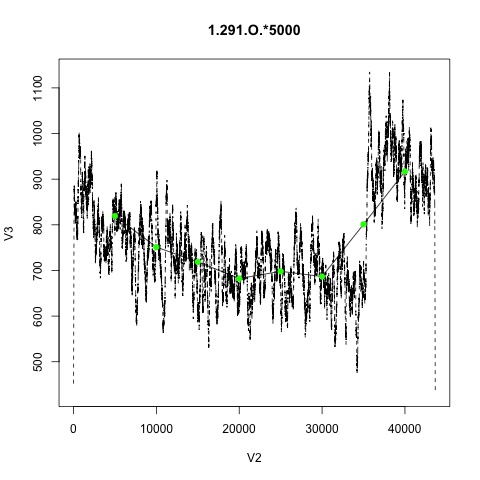

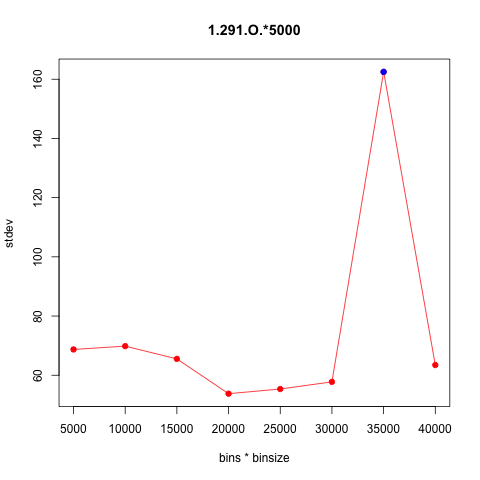

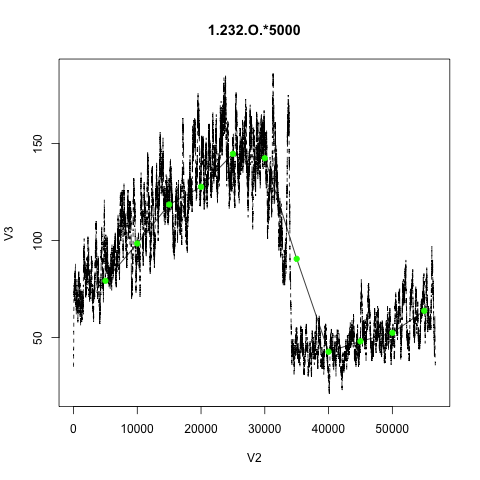

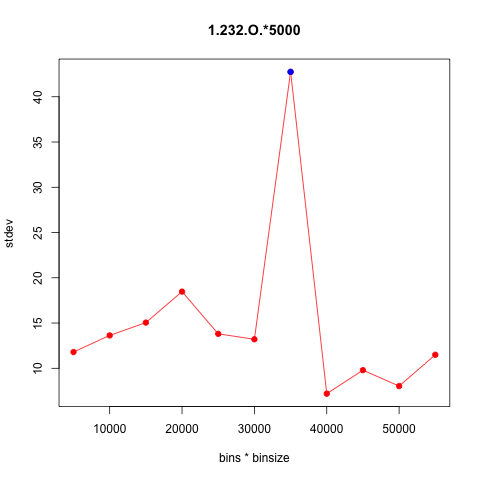

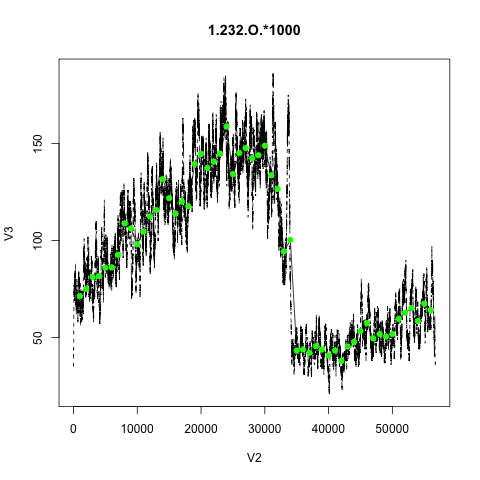

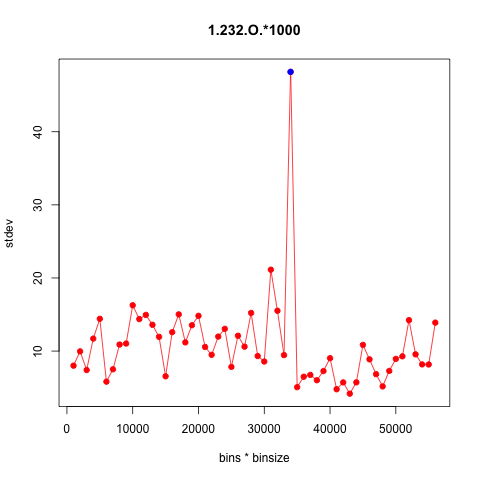

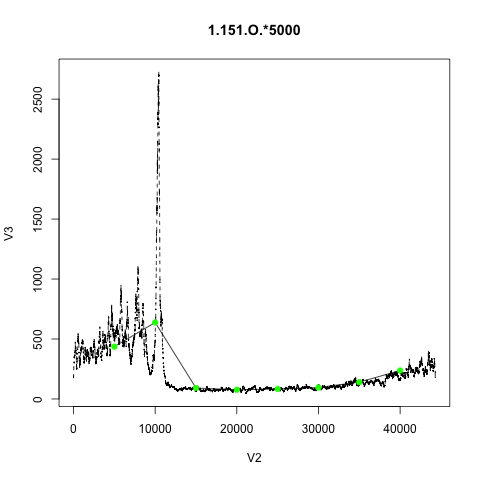

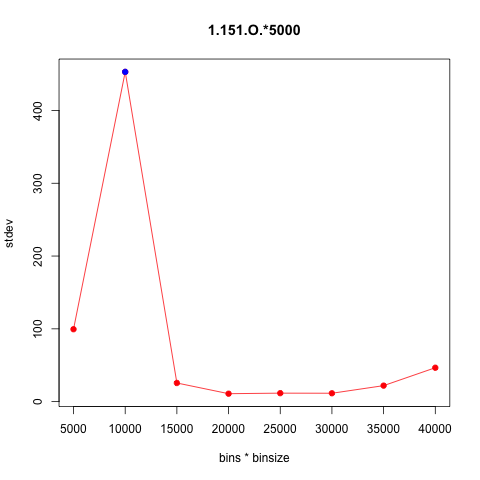

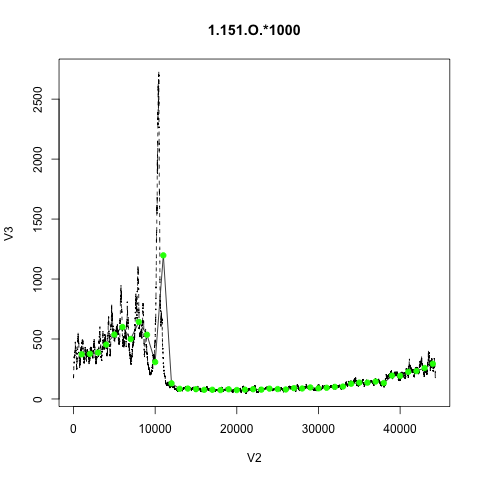

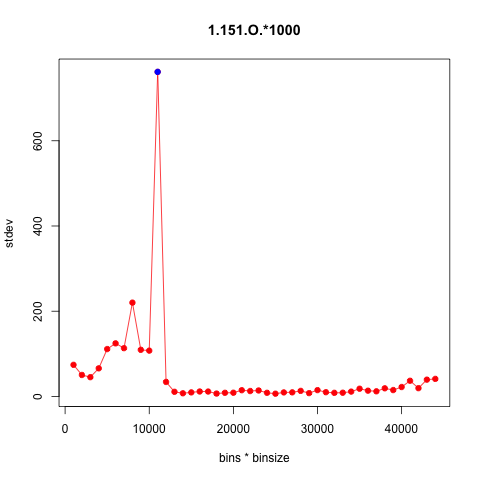

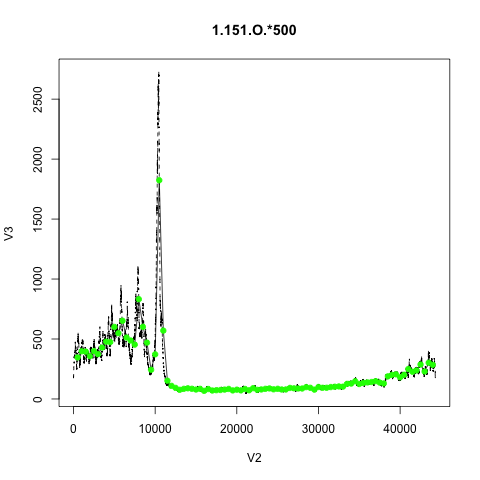

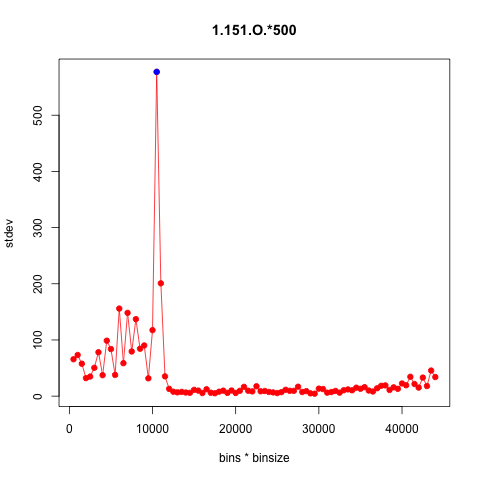

In [53]:
%%R -i group1

splits=c(5000,1000,500,100)

splitspots=vector()
read_pileup=vector()
everything_else=vector()

for (phage in group1){
    filename<-paste(phage,"step1.contig1.genomecoverage.txt",sep="")
    coverage<-read.table(filename, sep="\t")
    midpoint=0
    for (s in splits){
    binsize=s
    coverage$bins<-as.numeric(cut(coverage$V2, nrow(coverage)/binsize))
    bin_sum<-group_by(coverage, bins)%>%summarise(mean=mean(V3), stdev=sd(V3)) 

    #with(bin_sum, plot(bins, mean,type="n", main=phage))
    midspot=bin_sum$bins[bin_sum$stdev==max(bin_sum$stdev)]
    binsum<-bin_sum[order(-bin_sum$stdev),]
    if (binsum$stdev[1]>2*binsum$stdev[2] & midspot>1 & midspot<nrow(binsum)){
        print(midspot)
        mark="*"
        with(coverage, plot(V2,V3, main=paste(phage,mark,binsize,sep=""), type="n"))
        with(coverage, lines(V2,V3, lty=2))
        with(bin_sum, lines(bins*binsize, mean))
        with(bin_sum, points(bins*binsize, mean, pch=19, col="green"))
    
        with(bin_sum, plot(bins*binsize, stdev, type="n",main=paste(phage,mark,binsize,sep=""), col="red",pch=19))
        with(bin_sum, points(bins*binsize, stdev, main=phage, col="red",pch=19))
        with(bin_sum, lines(bins*binsize, stdev, main=phage, col="red",pch=19))
        points(bin_sum$bins[bin_sum$stdev==max(bin_sum$stdev)]*binsize, max(bin_sum$stdev), col="blue", pch=19)
        midpoint=midspot*binsize-(binsize/2)
    } else {
        mark=""
    }
        
        
    
    #with(bin_sum, lines(bins, mean, main=phage))
    #with(bin_sum, points(bins, mean, main=paste(phage,mark,sep=""), pch=19, col="green"))
    
    #with(bin_sum, plot(bins, stdev, type="n",main=paste(phage,mark,sep=""), col="red",pch=19))
    #with(bin_sum, points(bins, stdev, main=phage, col="red",pch=19))
    #with(bin_sum, lines(bins, stdev, main=phage, col="red",pch=19))
}
    if (midpoint>0){
        print(paste("here we go with ",phage, sep=" "))
            splitspots<-c(splitspots, midpoint)
            read_pileup<-c(read_pileup, phage)
        }  else {
            everything_else<-c(everything_else, phage)
        }
    }

In [54]:
%%R 

print(read_pileup)
print(splitspots)
print(everything_else)

[1] "1.278.O." "1.284.A." "1.287.O." "1.291.O." "1.232.O." "1.151.O."
[1] 28250 31250 12500 32500 33500 10250
 [1] "1.289.A." "1.199.B." "2.095.B." "1.003.O." "1.047.O." "1.286.O."
 [7] "1.029.O." "1.265.O." "1.105.O." "1.038.O." "1.154.O." "1.173.O."
[13] "1.177.O." "1.213.O." "1.036.O." "1.276.O." "1.016.O." "1.243.O."
[19] "1.198.B." "1.127.O." "1.263.B." "1.123.O." "1.216.O." "1.039.O."
[25] "1.178.O." "1.054.O." "1.236.O." "1.119.O." "1.067.O." "1.112.O."
[31] "1.198.A." "1.199.A." "1.149.O." "1.007.O." "1.186.O." "1.079.O."
[37] "1.091.O." "1.143.O." "1.197.A." "1.137.O." "1.106.O." "1.090.B."
[43] "1.273.O." "1.071.A." "1.060.A." "1.042.O." "1.263.A." "1.113.A."
[49] "1.135.O." "2.095.A." "1.061.O." "1.248.O." "1.144.O." "1.256.O."
[55] "1.231.O." "1.052.A."


###Extract initial ORFs and determine locations of terminases:

In [23]:
groupfile=group1
prodigal=open("prodigal.sh","w")
prodigal.write("#!/bin/bash\n#SBATCH -n 16\n#SBATCH -N 1\n#SBATCH -o prodigal.out\n#SBATCH -e prodigal.err\n#SBATCH -p sched_mit_chisholm\n\n")
prodigal.write("module add engaging/prodigal/2.6.1\n\n")
for line in groupfile:
    prodigal.write("prodigal -i "+line+"step1.contig1.fasta -o "+line+"genes -a "+line+"proteins.faa -p meta\n")
prodigal.close()
!open prodigal.sh -a textedit
!scp prodigal.sh jbrown@eofe4.mit.edu:/nobackup1/jbrown/nahant_phage_reads/group1/

prodigal.sh                                   100% 5672     5.5KB/s   00:00    


In [24]:
groupfile=group1
blast_commands=open("blast_commands.sh","w")
blast_commands.write("#!/bin/bash\n#SBATCH -n 16\n#SBATCH -N 1\n#SBATCH -o blast.out\n#SBATCH -e blast.err\n#SBATCH -p sched_mit_chisholm\n\n")
blast_commands.write("module add engaging/ncbi-blast/2.2.30+\n\n\n")
for line in groupfile:
    inputfasta=line+"proteins.faa"
    bout1=line+"prodprot.vs.lg.terminases.txt"
    bout2=line+"prodprot.vs.sm.terminases.txt"
    blastcommand="blastp -db /nobackup1/jbrown/blast_db/terminase_lg_subunit.fasta -query "+inputfasta+" -num_descriptions 1 -evalue 0.00001 -outfmt 6 -out "+bout1
    #blastcommand2="blastx -db /nobackup1/jbrown/blast_db/terminase_sm_subunit.fasta -query "+inputfasta+" -num_descriptions 1 -outfmt 6 -out "+bout2
    blast_commands.write(blastcommand+"\n")#+blastcommand2+"\n\n")
blast_commands.close()
!open blast_commands.sh -a textedit
!scp blast_commands.sh jbrown@eofe4.mit.edu:/nobackup1/jbrown/nahant_phage_reads/group1/

blast_commands.sh                             100%   11KB  11.2KB/s   00:00    


In [25]:
!scp jbrown@eofe4.mit.edu:/nobackup1/jbrown/nahant_phage_reads/group1/*.vs.lg.terminase* ./
!scp jbrown@eofe4.mit.edu:/nobackup1/jbrown/nahant_phage_reads/group1/*genes ./

1.003.O.prodprot.vs.lg.terminases.txt         100% 4251     4.2KB/s   00:00    
1.007.O.prodprot.vs.lg.terminases.txt         100% 8715     8.5KB/s   00:00    
1.016.O.prodprot.vs.lg.terminases.txt         100%   12KB  11.8KB/s   00:01    
1.029.O.prodprot.vs.lg.terminases.txt         100% 2894     1.4KB/s   00:02    
1.036.O.prodprot.vs.lg.terminases.txt         100% 4251     4.2KB/s   00:00    
1.038.O.prodprot.vs.lg.terminases.txt         100% 2934     2.9KB/s   00:00    
1.039.O.prodprot.vs.lg.terminases.txt         100% 4195     1.4KB/s   00:03    
1.042.O.prodprot.vs.lg.terminases.txt         100%   12KB  12.2KB/s   00:00    
1.047.O.prodprot.vs.lg.terminases.txt         100% 3052     3.0KB/s   00:00    
1.052.A.prodprot.vs.lg.terminases.txt         100% 4825     4.7KB/s   00:00    
1.054.O.prodprot.vs.lg.terminases.txt         100% 2936     2.9KB/s   00:00    
1.060.A.prodprot.vs.lg.terminases.txt         100% 3100     3.0KB/s   00:00    
1.061.O.prodprot.vs.lg.terminases.txt   

In [13]:
for phage in group1:
    blast=open(phage+"prodprot.vs.lg.terminases.txt").readlines()       #open blast file 
    print(phage)
    terminase_hits=[]
    for line in blast:
        
        if line.split("\t")[0] not in terminase_hits:
            terminase_hits.append(line.split("\t")[0])
    if len(terminase_hits)==1:
        print("one orf matches terminase")
    else:
        print(terminase_hits)

1.278.O.
one orf matches terminase
1.289.A.
['contig_1_12', 'contig_1_13']
1.199.B.
one orf matches terminase
2.095.B.
one orf matches terminase
1.003.O.
one orf matches terminase
1.047.O.
['contig_1_12', 'contig_1_13']
1.286.O.
one orf matches terminase
1.029.O.
one orf matches terminase
1.284.A.
['contig_1_40', 'contig_1_41']
1.287.O.
['contig_1_14', 'contig_1_15']
1.265.O.
['contig_1_6', 'contig_1_7']
1.291.O.
['contig_1_70', 'contig_1_72']
1.105.O.
one orf matches terminase
1.038.O.
one orf matches terminase
1.154.O.
one orf matches terminase
1.173.O.
one orf matches terminase
1.177.O.
one orf matches terminase
1.213.O.
['contig_1_1', 'contig_1_74']
1.036.O.
one orf matches terminase
1.276.O.
one orf matches terminase
1.016.O.
one orf matches terminase
1.243.O.
one orf matches terminase
1.198.B.
one orf matches terminase
1.127.O.
['contig_1_50', 'contig_1_51']
1.263.B.
one orf matches terminase
1.123.O.
one orf matches terminase
1.216.O.
one orf matches terminase
1.039.O.
['contig_

In [5]:
from Bio.Seq import Seq

groupfile=group1
special_cases=[]
for phage in groupfile:

    #Create dictionary of identity and location of prodigal calls for phage genome
    gene_tbl=open(phage+"genes").readlines()     #open prodigal gene table for phage genome
    loc=[]
    nam=[]
    for line in gene_tbl[2:]:
        here=line.split()
        if here[0]=="CDS":
            loc.append(here[1])
        else:
            info=here[0].split(";")
            there=info[0].split("=")
            if len(there)==3:
                nam.append("contig_"+there[2])
    dict1=dict(zip(nam,loc))                  #create dictionary of the location of each orf by prodigal-assigned name
    
                                             #use contig identified in first entry of blast file
    
    blast=open(phage+"prodprot.vs.lg.terminases.txt").readlines()       #open blast file 
    terminase_hits=[]
    for line in blast:
        
        if line.split("\t")[0] not in terminase_hits:
            terminase_hits.append(line.split("\t")[0])
    if len(terminase_hits)==1:
        orf=blast[0].split("\t")[0]
        value=dict1[orf]                                                    #pull out location of BLAST-identified terminase
    
        if value.startswith("complement"):                                  #determine orientation of orf and
            adjust=orf.split("_")                                           #identification of start of gene upstream of terminase large subunit
            orientation="reverse"
            key2=adjust[0]+"_"+adjust[1]+"_"+str(int(adjust[2])+1)
            value2=dict1.get(key2,0)
            if dict1.get(key2,0)!=0:                                           

                vec1=value2.split("(")
                vec2=vec1[1].split("..")
                start=vec2[1].replace(">","").replace(")","")
                stop=vec2[0].replace(">","").replace(")","")

            else:
                print("end of contig reverse")
                key2=adjust[0]+"_"+adjust[1]+"_1"
                orientation="reverse"
                value2=dict1.get(key2,"end of contig")
                vec1=value2.split("(")
                vec2=vec1[1].split("..")
                start=vec2[0].replace(">","").replace(")","")
                stop=vec2[1].replace(">","").replace(")","")

        else:
            adjust=orf.split("_")
            key2=adjust[0]+"_"+adjust[1]+"_"+str(int(adjust[2])-1)
            orientation="forward"
            if dict1.get(key2,0)!=0:
                value2=dict1.get(key2,"end of contig")
                vec2=value2.split("..")
                start=vec2[0].replace(">","").replace(")","")
                stop=vec2[1].replace(">","").replace(")","")      
            else:
                print("end of contig forward")
                orf_num=len(dict1)
                key2=adjust[0]+"_"+adjust[1]+"_"+str(orf_num)
                if ">" in dict1.get(key2,0):
                    key2=adjust[0]+"_"+adjust[1]+"_"+str(orf_num-1)
                value2=dict1.get(key2, 0)
                vec2=value2.split("..")
                start=vec2[0].replace(">","").replace(")","")
                stop=vec2[1].replace(">","").replace(")","")
        print(orientation+":"+value2)
        fastafile=phage+"step1.contig1.fasta"
        f=open(fastafile)                                       #opoen fasta file
        sequence=""
        for row in f:                           #define title and sequences
            if row.startswith(">"):
                title=row
            else:
                sequence+=row
        sequence=sequence.replace("\n","")

        if start!=0:
            outfile=open(phage+"s1c1.rearrange.fasta","w")
            upstream=sequence[0:int(start)-1]                    #id sequence before start of small subunit terminase
            downstream=sequence[int(start)-1:]                   #id sequence after start of small subunit terminase 
            rearrange=downstream+upstream                        #re-arrange contigs so that small subunit terminase start is at end of contig
            if orientation=="reverse":                           #reverse-complement the genome if terminase gene is in reverse orientation
                seq=Seq(rearrange)
                out_seq=seq.reverse_complement()
                outfile.write(">"+phage+"\n"+str(out_seq))
            else:
                outfile.write(">"+phage+"\n"+rearrange)

        outfile.close()
        print(phage+" done!")
    else:
        special_cases.append(phage)
        print(phage+" is a weirdo")

forward:28243..28677
1.278.O. done!
1.289.A. is a weirdo
forward:15762..15971
1.199.B. done!
reverse:complement(41695..42138)
2.095.B. done!
reverse:complement(34704..35126)
1.003.O. done!
1.047.O. is a weirdo
forward:12712..12921
1.286.O. done!
forward:1362..1910
1.029.O. done!
1.284.A. is a weirdo
1.287.O. is a weirdo
1.265.O. is a weirdo
1.291.O. is a weirdo
forward:41487..41924
1.105.O. done!
forward:29716..30264
1.038.O. done!
forward:1965..2189
1.154.O. done!
forward:37461..37670
1.173.O. done!
reverse:complement(12821..13192)
1.177.O. done!
1.213.O. is a weirdo
forward:27305..27751
1.036.O. done!
reverse:complement(30351..30788)
1.276.O. done!
forward:12820..13263
1.016.O. done!
reverse:complement(27439..27651)
1.243.O. done!
forward:42178..42615
1.198.B. done!
1.127.O. is a weirdo
reverse:complement(49211..>49639)
1.263.B. done!
forward:21985..22332
1.123.O. done!
reverse:complement(5108..5479)
1.216.O. done!
1.039.O. is a weirdo
reverse:complement(32091..32552)
1.232.O. done!


In [6]:
special_cases

['1.289.A.',
 '1.047.O.',
 '1.284.A.',
 '1.287.O.',
 '1.265.O.',
 '1.291.O.',
 '1.213.O.',
 '1.127.O.',
 '1.039.O.',
 '1.178.O.',
 '1.119.O.',
 '1.149.O.',
 '1.143.O.',
 '1.197.A.',
 '1.273.O.',
 '1.060.A.',
 '1.113.A.',
 '1.231.O.',
 '1.052.A.']

In [35]:
special_cases
for phage in special_cases:
    print(phage)
    #Create dictionary of identity and location of prodigal calls for phage genome
    gene_tbl=open(phage+"genes").readlines()     #open prodigal gene table for phage genome
    loc=[]
    nam=[]
    for line in gene_tbl[2:]:
        here=line.split()
        if here[0]=="CDS":
            loc.append(here[1])
        else:
            info=here[0].split(";")
            there=info[0].split("=")
            if len(there)==3:
                nam.append("contig_"+there[2])
    dict1=dict(zip(nam,loc))                  #create dictionary of the location of each orf by prodigal-assigned name
    
                                             #use contig identified in first entry of blast file
    
    blast=open(phage+"prodprot.vs.lg.terminases.txt").readlines() 
    terminase_hits=[]
    e_values=[]
    for line in blast:
        if line.split("\t")[0] not in terminase_hits:
            terminase_hits.append(line.split("\t")[0])
            e_values.append(line.split("\t")[10])
    value=dict1[terminase_hits[0]]                                                    #pull out location of BLAST-identified terminase
    if value.startswith("complement"):
        adjust=orf.split("_")                                           #identification of start of gene upstream of terminase large subunit
        orientation="reverse"
        key2=adjust[0]+"_"+adjust[1]+"_"+str(int(adjust[2])+len(terminase_hits))
        value2=dict1.get(key2,0)
    else:
        adjust=orf.split("_")                                           #identification of start of gene upstream of terminase large subunit
        orientation="forward"
        key2=adjust[0]+"_"+adjust[1]+"_"+str(int(adjust[2])-1)
        value2=dict1.get(key2,0)
    print(orientation)
    print(e_values)

1.289.A.
forward
['9e-20', '7e-155']
1.047.O.
reverse
['8e-152', '4e-19']
1.284.A.
reverse
['4e-155', '8e-19']
1.287.O.
reverse
['3e-156', '4e-19']
1.265.O.
reverse
['4e-131', '3e-12']
1.291.O.
forward
['3e-20', '3e-157']
1.213.O.
reverse
['2e-135', '2e-16']
1.127.O.
forward
['2e-14', '4e-126']
1.039.O.
forward
['3e-79', '2e-10']
1.178.O.
reverse
['2e-130', '1e-13']
1.119.O.
forward
['5e-19', '3e-126']
1.149.O.
reverse
['3e-77', '7e-25']
1.143.O.
forward
['5e-19', '3e-126']
1.197.A.
reverse
['3e-21', '4e-19', '6e-122']
1.273.O.
reverse
['3e-77', '1e-24']
1.060.A.
forward
['4e-21', '2e-166']
1.113.A.
reverse
['1e-157', '8e-19']
1.231.O.
reverse
['3e-126', '5e-19']
1.052.A.
forward
['2e-49', '0.0']


####It's weird that when there is only one hit to a terminase, the upstream gene is in the correct orientation, but when there is more than one hit, the upstream gene of the pair of terminases is not always in the same orientation...But when e_value is included, it seems that there is a distinct pattern of similarity where one moderately matches while the other is dead on (e<e-100).  Also interesting is the pattern where if the genes are forward, the first gene has a higher e-value, while if they are complemented, the first gene has a lower e-value.  Perhaps the gene with the strongest e-value should be considered the terminase, and the genome should then be clipped one gene upstream of it.

There are a couple exceptions to this pattern, but generally this appears to hold.

####Below I'm going to try to select the terminase with the lowest e-value, select the gene upstream of it and then clip and re-write the output

In [27]:
special_cases
for phage in special_cases:
    #Create dictionary of identity and location of prodigal calls for phage genome
    gene_tbl=open(phage+"genes").readlines()     #open prodigal gene table for phage genome
    loc=[]
    nam=[]
    for line in gene_tbl[2:]:
        here=line.split()
        if here[0]=="CDS":
            loc.append(here[1])
        else:
            info=here[0].split(";")
            there=info[0].split("=")
            if len(there)==3:
                nam.append("contig_"+there[2])
    dict1=dict(zip(nam,loc))                  #create dictionary of the location of each orf by prodigal-assigned name
    
                                             #use contig identified in first entry of blast file
    
    blast=open(phage+"prodprot.vs.lg.terminases.txt").readlines() 
    terminase_hits=[]
    e_values=[]
    best_evalue=1
    best_e_line=""
    for line in blast:
        if line.split("\t")[0] not in terminase_hits:
            terminase_hits.append(line.split("\t")[0])
            e_values.append(line.split("\t")[10])  
        
        if float(line.split("\t")[10])<best_evalue:
            best_evalue=float(line.split("\t")[10])
            top_orf=line.split("\t")[0]
            
    value=dict1[top_orf]                                                    #pull out location of BLAST-identified terminase
    
    if value.startswith("complement"):                                  #determine orientation of orf and
        adjust=top_orf.split("_")                                           #identification of start of gene upstream of terminase large subunit
        orientation="reverse"
        key2=adjust[0]+"_"+adjust[1]+"_"+str(int(adjust[2])+1)
        value2=dict1.get(key2,0)
        if dict1.get(key2,0)!=0:                                           

            
            vec2=value2.split("..")
            start=vec2[1].replace(">","").replace(")","")
            stop=vec2[0].replace(">","").replace(")","").replace("complement(","")

        else:
            print("end of contig reverse")
            key2=adjust[0]+"_"+adjust[1]+"_1"
            orientation="reverse"
            value2=dict1.get(key2,"end of contig")
            vec2=value2.split("..")
            start=vec2[0].replace(">","").replace(")","").replace("complement(","")
            stop=vec2[1].replace(">","").replace(")","")

    else:
        adjust=top_orf.split("_")
        key2=adjust[0]+"_"+adjust[1]+"_"+str(int(adjust[2])-1)
        orientation="forward"
        if dict1.get(key2,0)!=0:
            value2=dict1.get(key2,"end of contig")
            vec2=value2.split("..")
            start=vec2[0].replace(">","").replace(")","").replace("complement(","")
            stop=vec2[1].replace(">","").replace(")","")      
        else:
            print("end of contig forward")
            orf_num=len(dict1)
            key2=adjust[0]+"_"+adjust[1]+"_"+str(orf_num)
            if ">" in dict1.get(key2,0):
                key2=adjust[0]+"_"+adjust[1]+"_"+str(orf_num-1)
            value2=dict1.get(key2, 0)
            vec2=value2.split("..")
            start=vec2[0].replace(">","").replace(")","").replace("complement(","")
            stop=vec2[1].replace(">","").replace(")","")
    print(orientation+":"+value2)
    fastafile=phage+"step1.contig1.fasta"
    f=open(fastafile)                                       #opoen fasta file
    sequence=""
    for row in f:                           #define title and sequences
        if row.startswith(">"):
            title=row
        else:
            sequence+=row
    sequence=sequence.replace("\n","")

    if start!=0:
        outfile=open(phage+"s1c1.rearrange.fasta","w")
        upstream=sequence[0:int(start)-1]                    #id sequence before start of small subunit terminase
        downstream=sequence[int(start)-1:]                   #id sequence after start of small subunit terminase 
        rearrange=downstream+upstream                        #re-arrange contigs so that small subunit terminase start is at end of contig
        if orientation=="reverse":                           #reverse-complement the genome if terminase gene is in reverse orientation
            seq=Seq(rearrange)
            out_seq=seq.reverse_complement()
            outfile.write(">"+phage+"\n"+str(out_seq))
        else:
            outfile.write(">"+phage+"\n"+rearrange)

    outfile.close()
    print(phage+" done!")

NameError: name 'special_cases' is not defined

In [35]:
ls *s1c1.rearrange*

1.003.O.s1c1.rearrange.fasta  1.154.O.s1c1.rearrange.fasta
1.007.O.s1c1.rearrange.fasta  1.173.O.s1c1.rearrange.fasta
1.016.O.s1c1.rearrange.fasta  1.177.O.s1c1.rearrange.fasta
1.029.O.s1c1.rearrange.fasta  1.178.O.s1c1.rearrange.fasta
1.036.O.s1c1.rearrange.fasta  1.186.O.s1c1.rearrange.fasta
1.038.O.s1c1.rearrange.fasta  1.197.A.s1c1.rearrange.fasta
1.039.O.s1c1.rearrange.fasta  1.198.A.s1c1.rearrange.fasta
1.042.O.s1c1.rearrange.fasta  1.198.B.s1c1.rearrange.fasta
1.047.O.s1c1.rearrange.fasta  1.199.A.s1c1.rearrange.fasta
1.052.A.s1c1.rearrange.fasta  1.199.B.s1c1.rearrange.fasta
1.054.O.s1c1.rearrange.fasta  1.213.O.s1c1.rearrange.fasta
1.060.A.s1c1.rearrange.fasta  1.216.O.s1c1.rearrange.fasta
1.061.O.s1c1.rearrange.fasta  1.231.O.s1c1.rearrange.fasta
1.067.O.s1c1.rearrange.fasta  1.232.O.s1c1.rearrange.fasta
1.071.A.s1c1.rearrange.fasta  1.236.O.s1c1.rearrange.fasta
1.079.O.s1c1.rearrange.fasta  1.243.O.s1c1.rearrange.fasta
1.090.B.s1c1.rearrange.fasta  1.248.O.s1c1.rearrange.fas

In [36]:
script=open("rearrange_recruitment.slurm","w")
script.write("#!/bin/bash\n#SBATCH -n 16\n#SBATCH -N 1\n#SBATCH -o rearrange.out\n#SBATCH -e rearrange.err\n#SBATCH -p sched_mit_chisholm\n\n")
script.write("module add engaging/clc-assembly-cell\nmodule add engaging/samtools/1.1\nmodule add engaging/bedtools/2.22.1\n\n")

for virus in groupfile:
    target_seq=virus+"s1c1.rearrange.fasta"
    reads=virus+"*.fastq"
    recruitfile=virus+"s1c1.rearrange.cas"
    outputfasta=virus+"final.fasta"
    directed=virus+"rearrange."

    script.write("clc_mapper -o "+recruitfile+" -p fb ss 100 300 -q "+reads+" -d "+target_seq+" -a local -r ignore \n")
    script.write("clc_extract_consensus -z none -a "+recruitfile+" -o "+outputfasta+"\n")
    script.write("clc_cas_to_sam -a "+recruitfile+" -o "+directed+"bam\n")
    script.write("samtools sort "+directed+"bam "+directed+"sorted\n")
    script.write("samtools index "+directed+"sorted.bam\n")
    script.write("bedtools genomecov -ibam "+directed+"sorted.bam -d > "+directed+"genomecoverage.txt\n\n")

script.close()
!open rearrange_recruitment.slurm -a textedit

In [37]:
!scp rearrange_recruitment.slurm jbrown@eofe4.mit.edu:/nobackup1/jbrown/nahant_phage_reads/group1/
!scp *s1c1.rearrange.fasta jbrown@eofe4.mit.edu:/nobackup1/jbrown/nahant_phage_reads/group1/

rearrange_recruitment.slurm                   100%   30KB  29.5KB/s   00:00    
1.003.O.s1c1.rearrange.fasta                  100%   41KB  40.9KB/s   00:00    
1.007.O.s1c1.rearrange.fasta                  100%   48KB  48.1KB/s   00:00    
1.016.O.s1c1.rearrange.fasta                  100%   47KB  47.0KB/s   00:00    
1.029.O.s1c1.rearrange.fasta                  100%   45KB  45.4KB/s   00:00    
1.036.O.s1c1.rearrange.fasta                  100%   39KB  39.2KB/s   00:00    
1.038.O.s1c1.rearrange.fasta                  100%   48KB  48.4KB/s   00:00    
1.039.O.s1c1.rearrange.fasta                  100%   40KB  40.0KB/s   00:00    
1.042.O.s1c1.rearrange.fasta                  100%   49KB  48.6KB/s   00:00    
1.047.O.s1c1.rearrange.fasta                  100%   45KB  45.0KB/s   00:00    
1.052.A.s1c1.rearrange.fasta                  100%   42KB  41.9KB/s   00:00    
1.054.O.s1c1.rearrange.fasta                  100%   41KB  40.8KB/s   00:00    
1.060.A.s1c1.rearrange.fasta            

If these assemblies don't work well, perhaps I need to consider that this group matches terminases from phages with differing genome structures.

In [7]:
%%R
ktblast<-read.table("/Users/jmb/Desktop/KathrynDocs/ourTerminases-vs-NCBI-knownPack-prelim-033115KK.txt", sep="\t", header=TRUE, fill=TRUE)
egroup<-group_by(ktblast, Accession..E.value.)
e_hit_sum<-summarise(egroup, count=n())
categories<-read.table("/Users/jmb/Desktop/KathrynDocs/corrected_genome_categorization.txt", header=TRUE, sep="\t")
e_hit_sum$type<-categories$Virus.Type[match(e_hit_sum$Accession..E.value.,categories$Hit)]
ktblast$type<-e_hit_sum$type[match(ktblast$Accession..E.value.,e_hit_sum$Accession..E.value.)]
group1<-filter(ktblast, Genome.Cluster=="CNSv2.0:1")%>%group_by(., type)%>%summarise(.,count=n())
group1

In [16]:
%%R 
g1_p22<-filter(ktblast, Genome.Cluster=="CNSv2.0:1",type=="P22-like headful (ES18 sub-group)")
g1_p22phages<-as.vector(g1_p22$Query.1)
g1_p22phages

 [1] "1.003.O." "1.007.O." "1.036.O." "1.039.O." "1.052.A." "1.059.A."
 [7] "1.061.O." "1.067.O." "1.073.O." "1.079.O." "1.090.B." "1.091.O."
[13] "1.105.O." "1.106.O." "1.114.O." "1.123.O." "1.135.O." "1.137.O."
[19] "1.144.O." "1.149.O." "1.173.O." "1.177.O." "1.186.O." "1.199.A."
[25] "1.199.B." "1.213.O." "1.216.O." "1.236.O." "1.243.O." "1.248.O."
[31] "1.256.O." "1.263.A." "1.263.B." "1.273.O." "1.278.O." "1.286.O."
[37] "1.016.O." "1.042.O." "1.071.A." "1.071.B." "1.071.C." "1.071.D."
[43] "1.112.O." "1.151.O."


In [28]:
%Rpull g1_p22phages
#treat just like group4 phages:
from Bio.Seq import Seq
import os.path


groupfile=g1_p22phages

for phage in groupfile:
    if os.path.exists(phage+"genes"):
        #Create dictionary of identity and location of prodigal calls for phage genome
        gene_tbl=open(phage+"genes").readlines()     #open prodigal gene table for phage genome
        loc=[]
        nam=[]
        for line in gene_tbl[2:]:
            here=line.split()
            if here[0]=="CDS":
                loc.append(here[1])
            else:
                info=here[0].split(";")
                there=info[0].split("=")
                if len(there)==3:
                    nam.append("contig_"+there[2])
        dict1=dict(zip(nam,loc))                  #create dictionary of the location of each orf by prodigal-assigned name
        blast=open(phage+"prodprot.vs.lg.terminases.txt").readlines() 
        terminase_hits=[]
        e_values=[]
        best_evalue=1
        best_e_line=""
        for line in blast:
            if line.split("\t")[0] not in terminase_hits:
                terminase_hits.append(line.split("\t")[0])
                e_values.append(line.split("\t")[10])  

            if float(line.split("\t")[10])<best_evalue:
                best_evalue=float(line.split("\t")[10])
                orf=line.split("\t")[0]

        value=dict1[orf]                                                    #pull out location of BLAST-identified terminase
        if value.startswith("complement"):                                  #determine orientation of orf and
            adjust=orf.split("_")                                           #identification of start of gene upstream of terminase large subunit
            orientation="reverse"
            key2=adjust[0]+"_"+adjust[1]+"_"+str(int(adjust[2])+1)
            value2=dict1.get(key2,0)
            if dict1.get(key2,0)!=0:                                           

                vec1=value2.split("(")
                vec2=vec1[1].split("..")
                start=vec2[1].replace(">","").replace(")","")
                stop=vec2[0].replace(">","").replace(")","")

            else:
                print("end of contig reverse")
                key2=adjust[0]+"_"+adjust[1]+"_1"
                orientation="reverse"
                value2=dict1.get(key2,"end of contig")
                vec1=value2.split("(")
                vec2=vec1[1].split("..")
                start=vec2[0].replace(">","").replace(")","")
                stop=vec2[1].replace(">","").replace(")","")

        else:
            adjust=orf.split("_")
            key2=adjust[0]+"_"+adjust[1]+"_"+str(int(adjust[2])-1)
            orientation="forward"
            if dict1.get(key2,0)!=0:
                value2=dict1.get(key2,"end of contig")
                vec2=value2.split("..")
                start=vec2[0].replace(">","").replace(")","")
                stop=vec2[1].replace(">","").replace(")","")      
            else:
                print("end of contig forward")
                orf_num=len(dict1)
                key2=adjust[0]+"_"+adjust[1]+"_"+str(orf_num)
                if ">" in dict1.get(key2,0):
                    key2=adjust[0]+"_"+adjust[1]+"_"+str(orf_num-1)
                value2=dict1.get(key2, 0)
                vec2=value2.split("..")
                start=vec2[0].replace(">","").replace(")","")
                stop=vec2[1].replace(">","").replace(")","")
        fastafile=phage+"step1.contig1.fasta"
        f=open(fastafile)                                       #open fasta file
        sequence=""
        for row in f:                           #define title and sequences
            if row.startswith(">"):
                title=row
            else:
                sequence+=row
        sequence=sequence.replace("\n","")

        if start!=0:
            outfile=open(phage+"s1c1.rearrange.fasta","w")
            upstream=sequence[0:int(start)-1]                    #id sequence before start of small subunit terminase
            downstream=sequence[int(start)-1:]                   #id sequence after start of small subunit terminase 
            rearrange=downstream+upstream                        #re-arrange contigs so that small subunit terminase start is at end of contig
            if orientation=="reverse":                           #reverse-complement the genome if terminase gene is in reverse orientation
                seq=Seq(rearrange)
                out_seq=seq.reverse_complement()
                outfile.write(">"+phage+"\n"+str(out_seq))
            else:
                outfile.write(">"+phage+"\n"+rearrange)

        outfile.close()
        print(phage+" done!")
    else:
        print(phage+" sequence file does not exist")

1.003.O. done!
1.007.O. done!
1.036.O. done!
end of contig forward
1.039.O. done!
1.052.A. done!
1.059.A. sequence file does not exist
1.061.O. done!
1.067.O. done!
1.073.O. sequence file does not exist
1.079.O. done!
1.090.B. done!
1.091.O. done!
1.105.O. done!
1.106.O. done!
1.114.O. sequence file does not exist
1.123.O. done!
1.135.O. done!
1.137.O. done!
1.144.O. done!
1.149.O. done!
1.173.O. done!
1.177.O. done!
1.186.O. done!
1.199.A. done!
1.199.B. done!
1.213.O. done!
1.216.O. done!
1.236.O. done!
1.243.O. done!
1.248.O. done!
1.256.O. done!
1.263.A. done!
1.263.B. done!
1.273.O. done!
1.278.O. done!
1.286.O. done!
1.016.O. done!
1.042.O. done!
1.071.A. done!
1.071.B. sequence file does not exist
1.071.C. sequence file does not exist
1.071.D. sequence file does not exist
1.112.O. done!
1.151.O. done!


In [42]:
import glob
out=open("move_pdfs.txt","w")
pdf_files=glob.glob("*pdf")
gencov=glob.glob("*genomecoverage*")
print(len(gencov))
print(len(group1))

62
62


In [32]:
for line in groupfile:
    out.write("mv "+line+"*pdf ./p22_like\n")
out.close()
!open move_pdfs.txt -a textedit